<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: cornflowerblue;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 30px;
              color:snow;"> Sistema de Electrooculagrama

</h2>
</div>

<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: lightblue;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 20px;
              color:snow;"> Detección de movimiento ocular 

</h2>
</div>

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: lightsteelblue ;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 10px;
              color:snow;"> Señales originales de electrooculograma (Frame 2)

</h2>
</div>

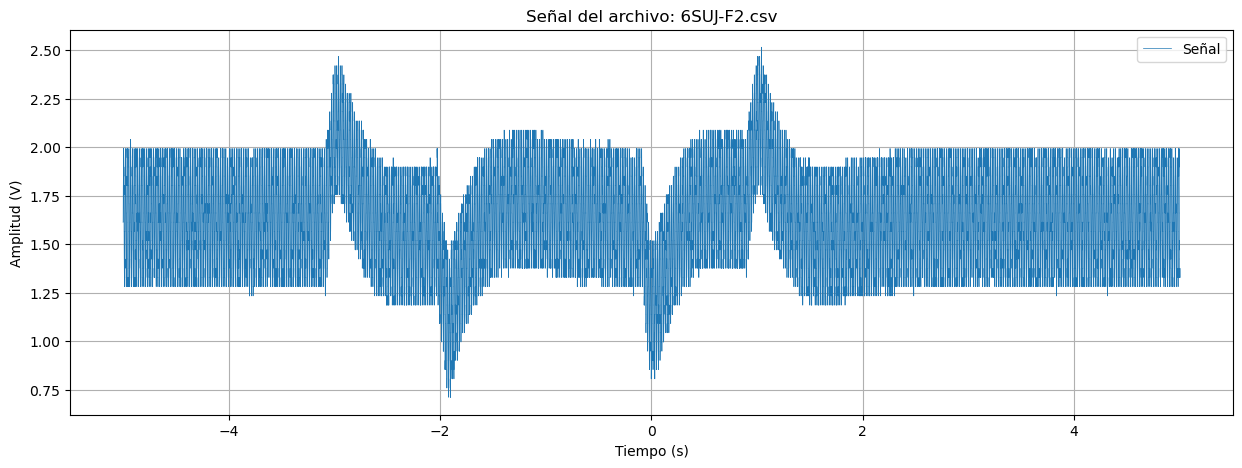

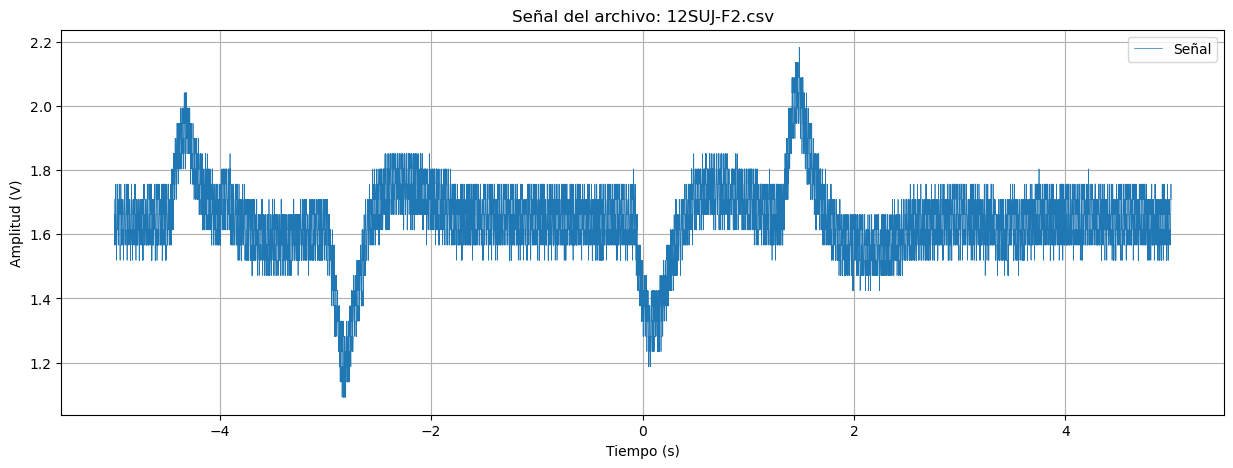

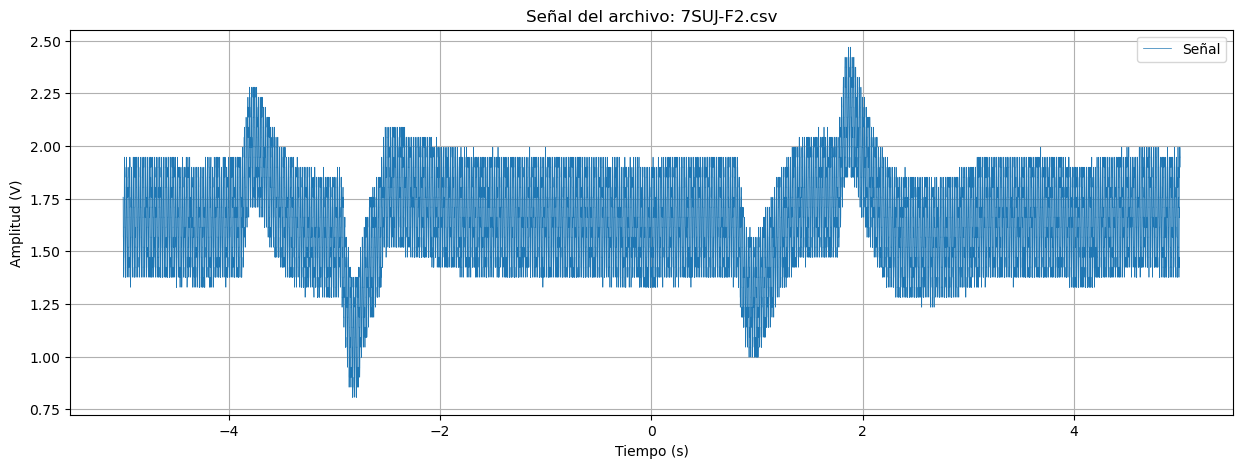

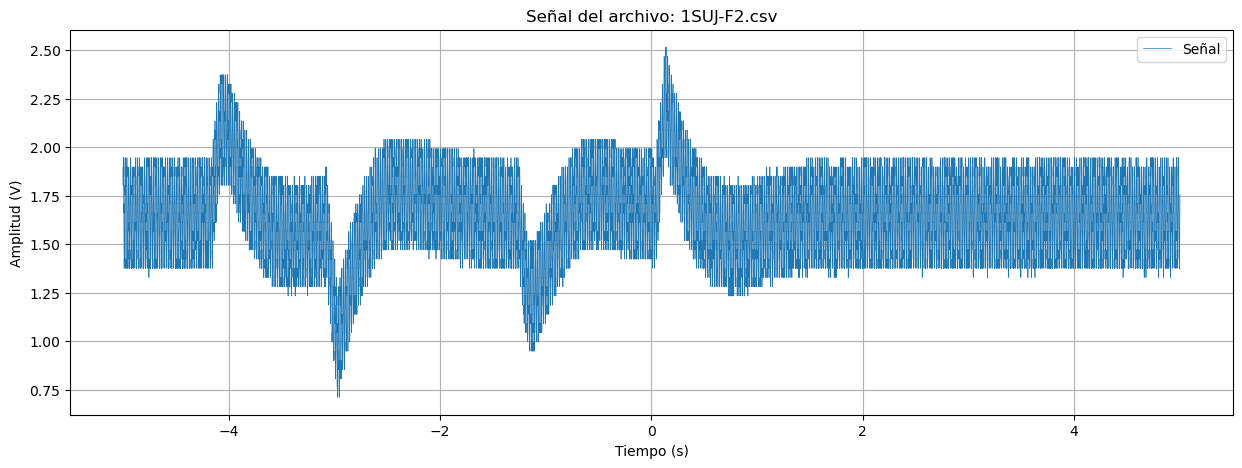

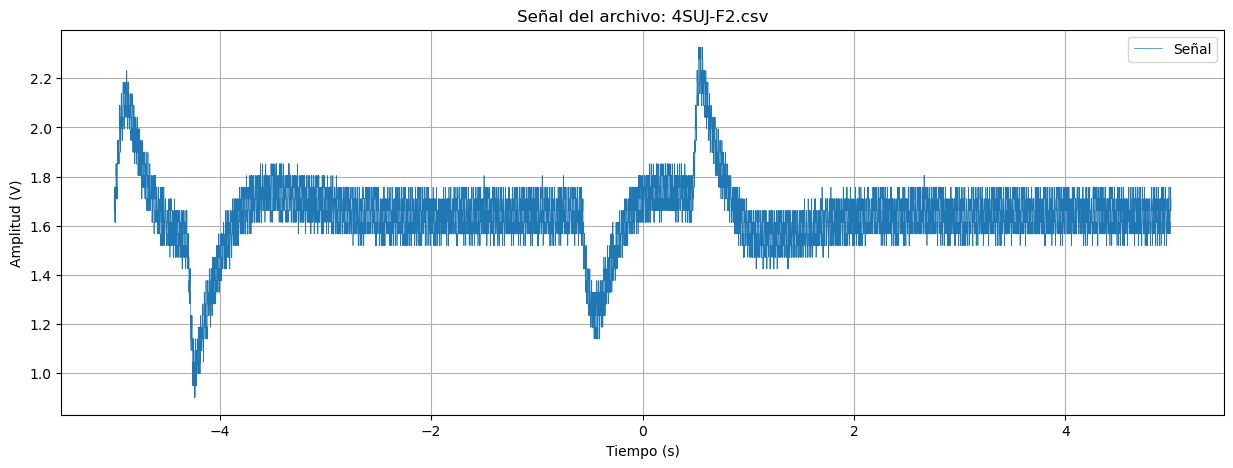

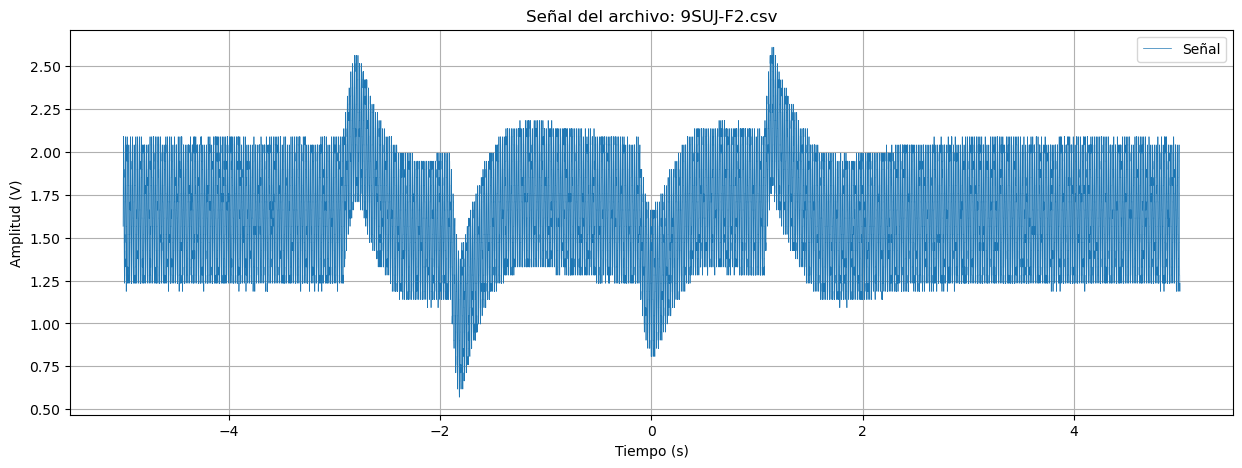

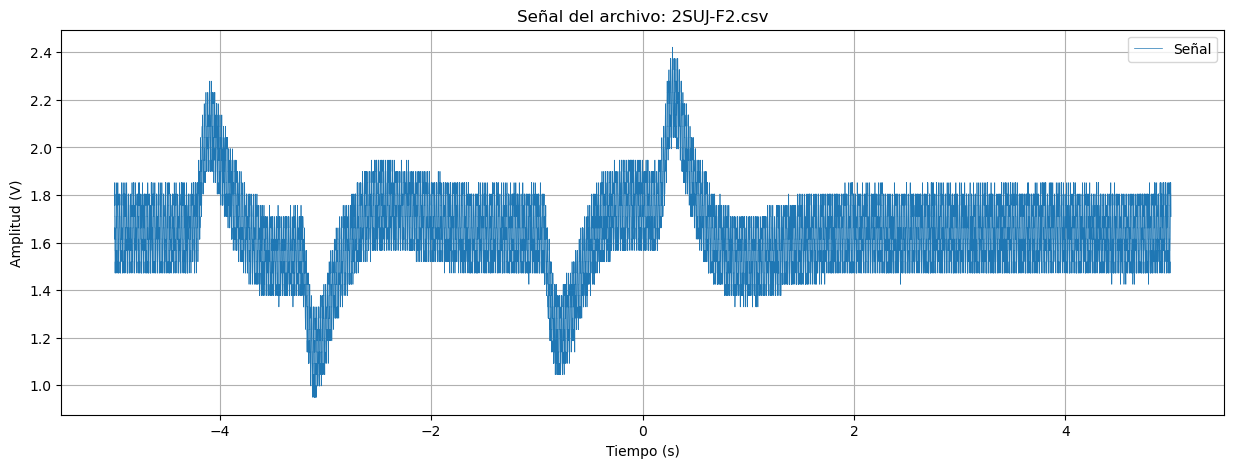

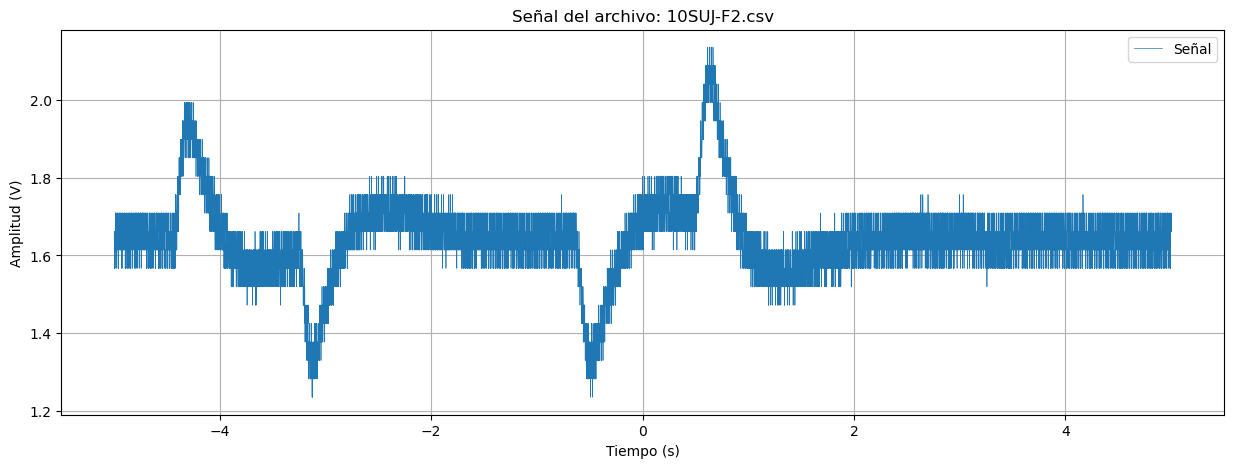

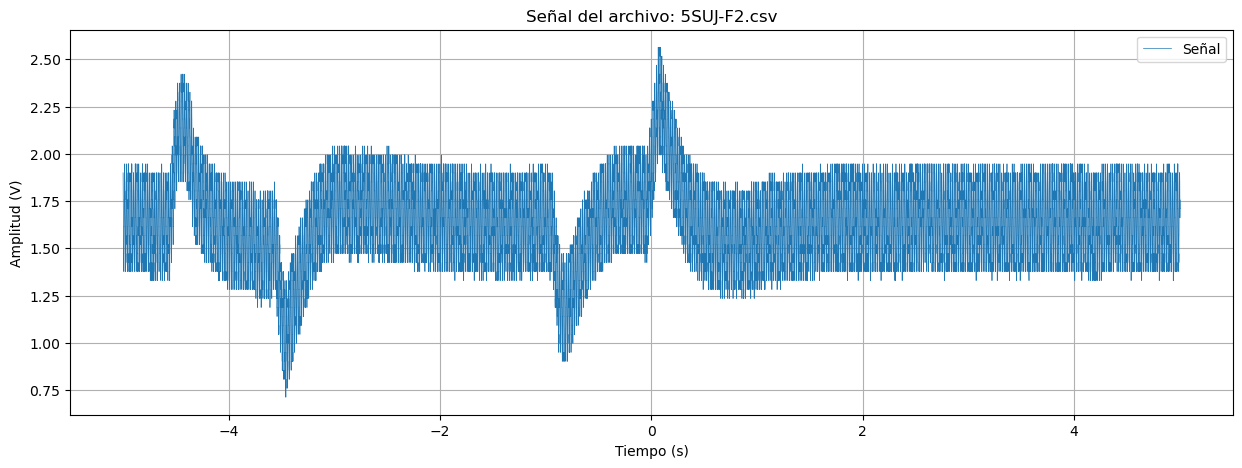

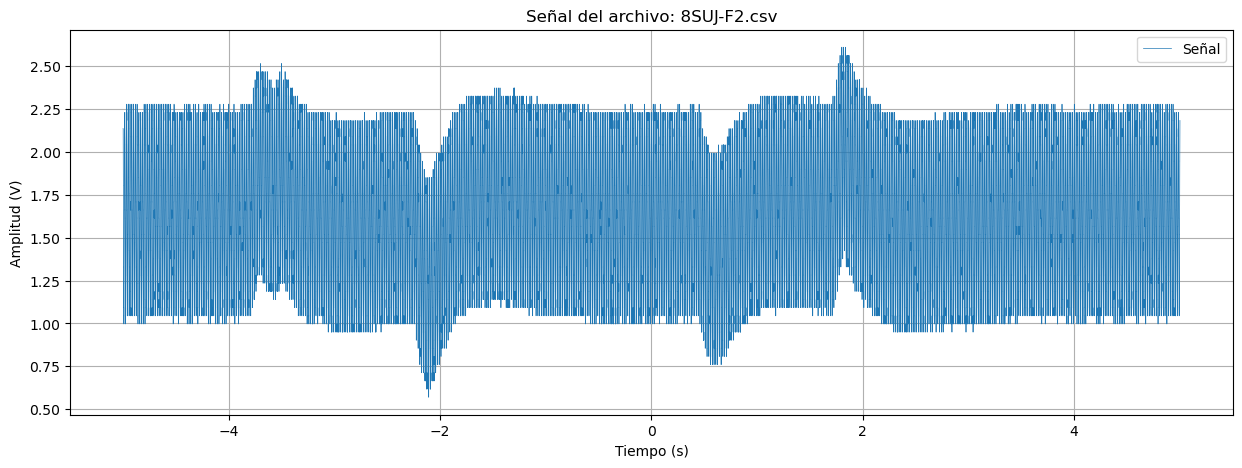

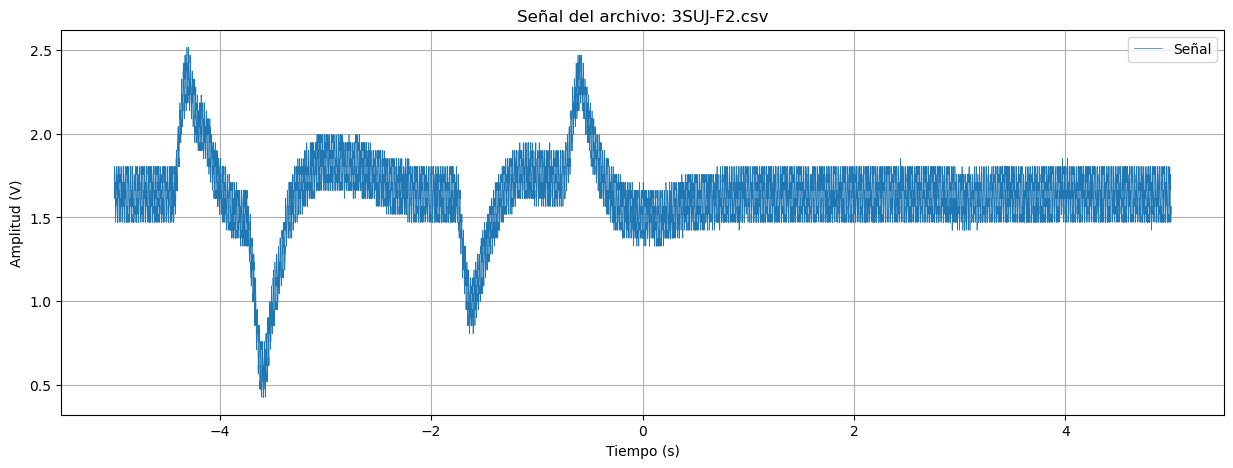

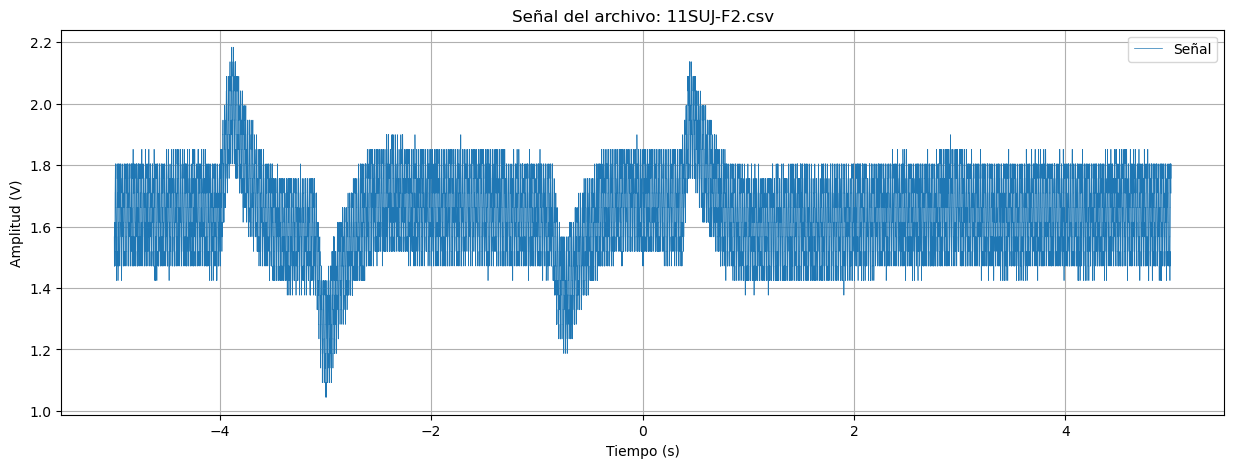

In [18]:
directorio_csv = 'CSV_F2'

# Lista todos los archivos CSV en el directorio
archivos_csv = [archivo for archivo in os.listdir(directorio_csv) if archivo.endswith('.csv')]

for archivo in archivos_csv:
    ruta_completa = os.path.join(directorio_csv, archivo)
    # Leer cada archivo CSV, saltando las primeras 3 filas
    df = pd.read_csv(ruta_completa, skiprows=10)

    # Seleccionar la primera columna para el tiempo y la segunda para los valores de la señal
    time = df.iloc[:, 0].to_numpy()
    signal = df.iloc[:, 1].to_numpy()

    # Calcular min y max para el eje Y
    min_value, max_value = signal.min(), signal.max()

    # Agregar un margen al eje Y
    margen = (max_value - min_value) * 0.05  # Un margen del 5%

    # Graficar la señal
    plt.figure(figsize=(15, 5))
    plt.plot(time, signal, label='Señal', linewidth=0.5)
    plt.ylim(min_value - margen, max_value + margen)  # Aplicar los límites con margen al eje Y
    plt.title(f'Señal del archivo: {archivo}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (V)')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()


<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: lightsteelblue ;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 10px;
              color:snow;"> Procesamiento de señales promedio móvil

</h2>
</div>

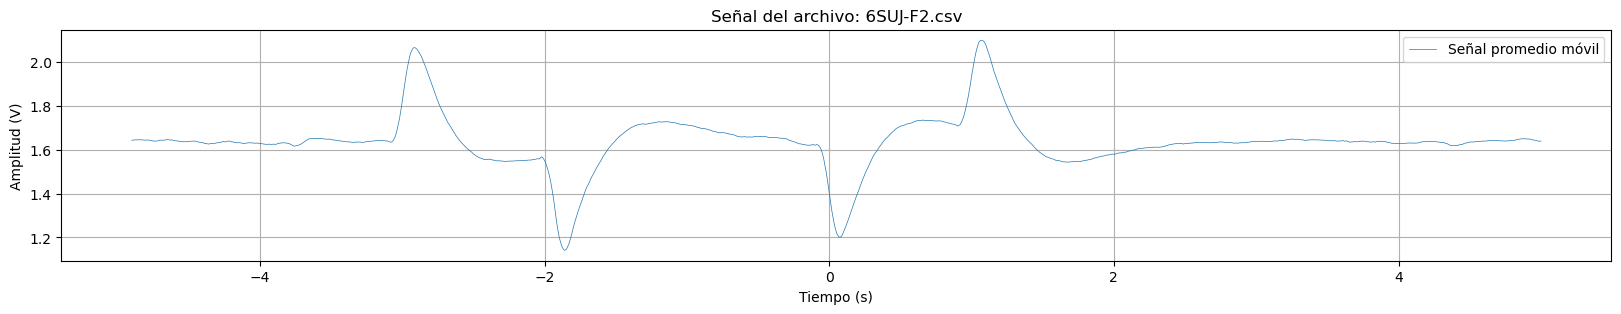

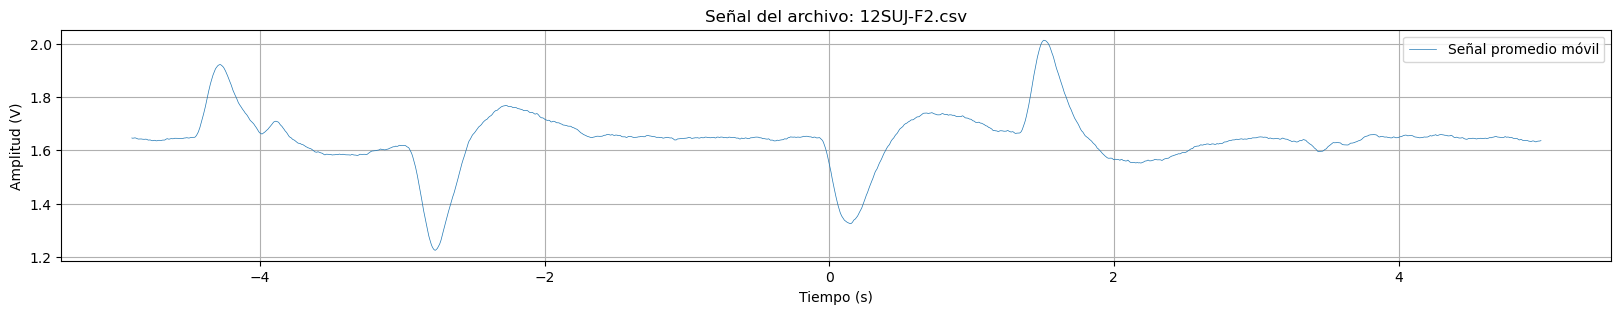

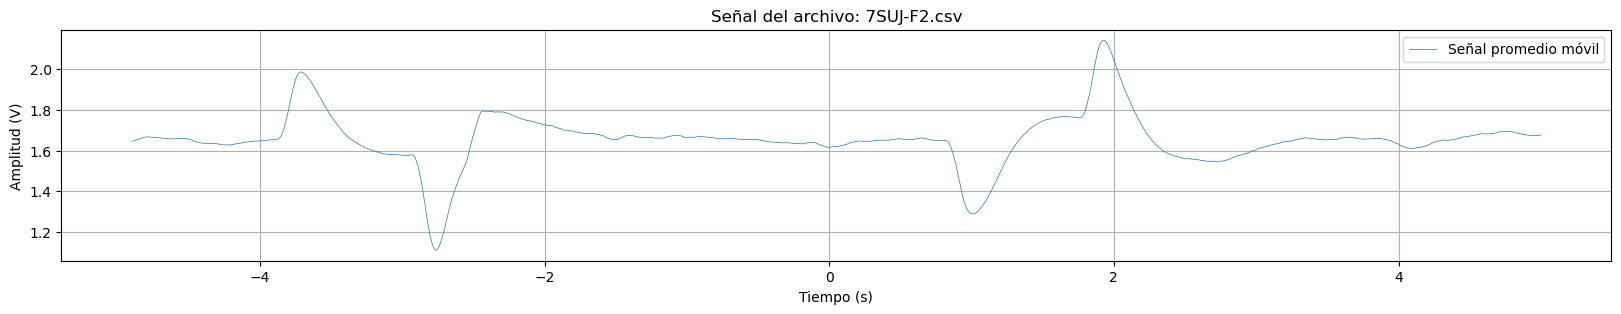

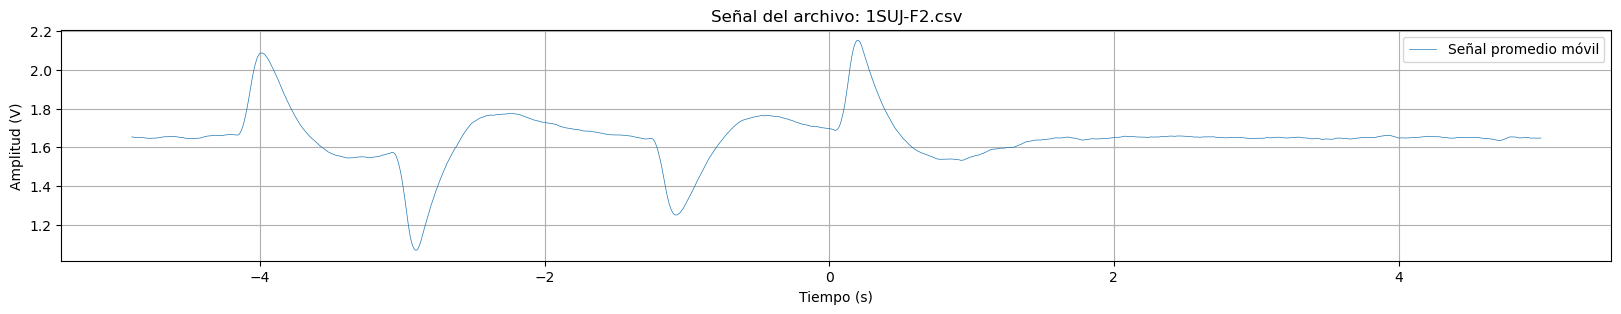

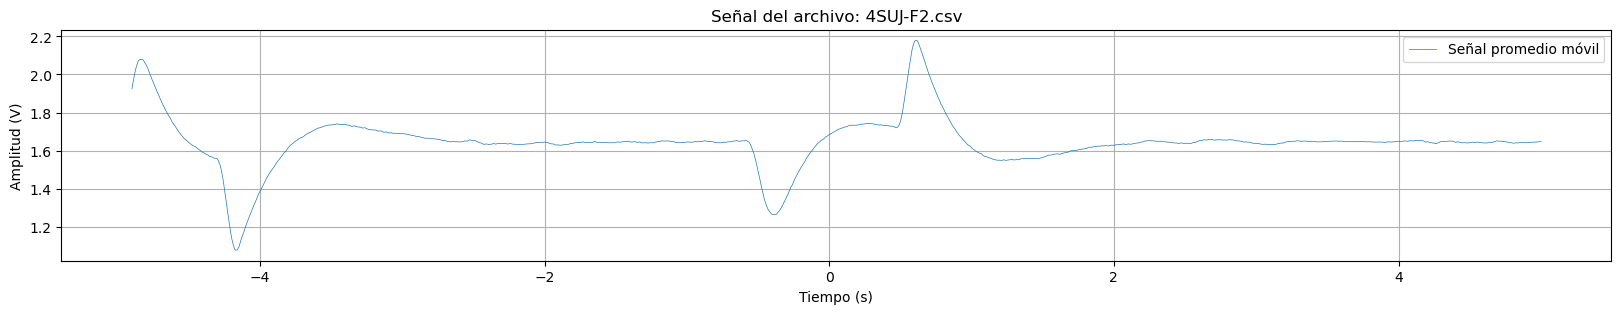

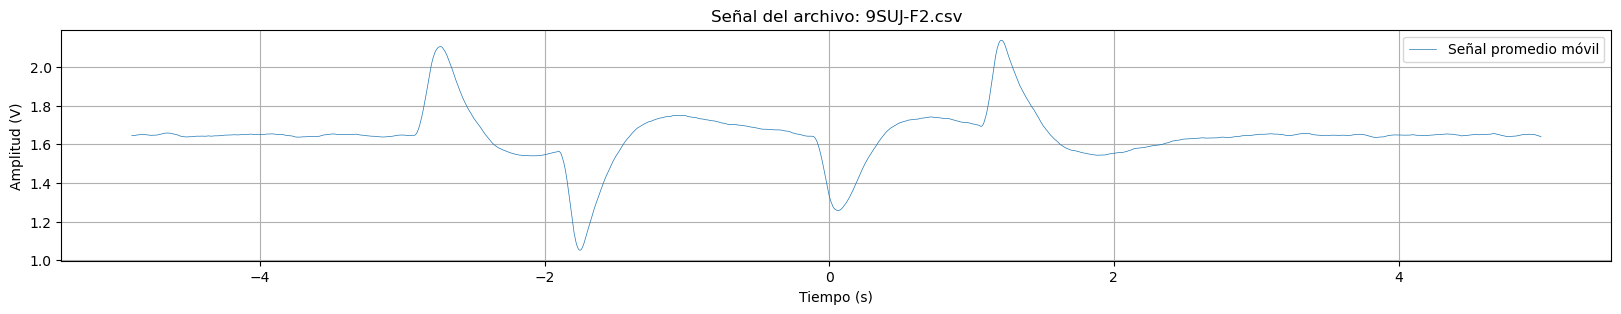

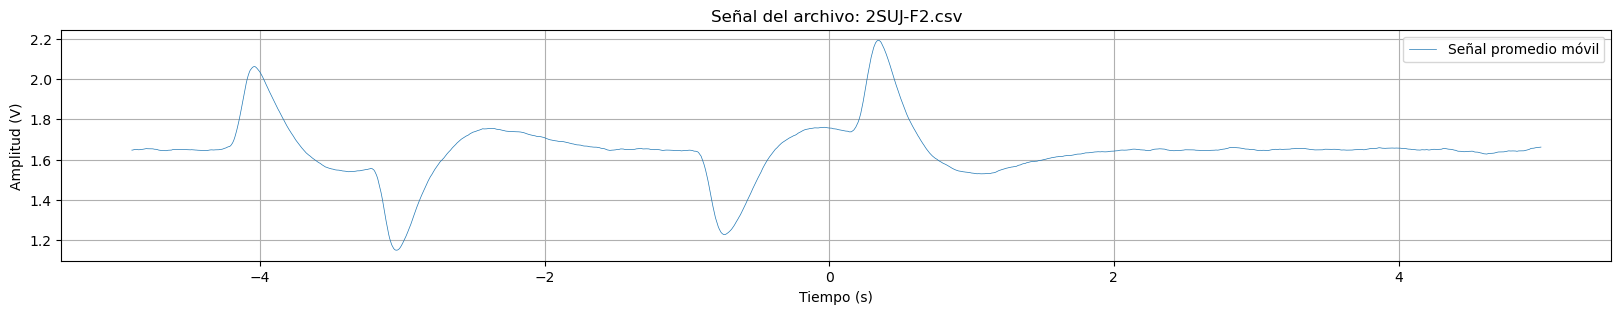

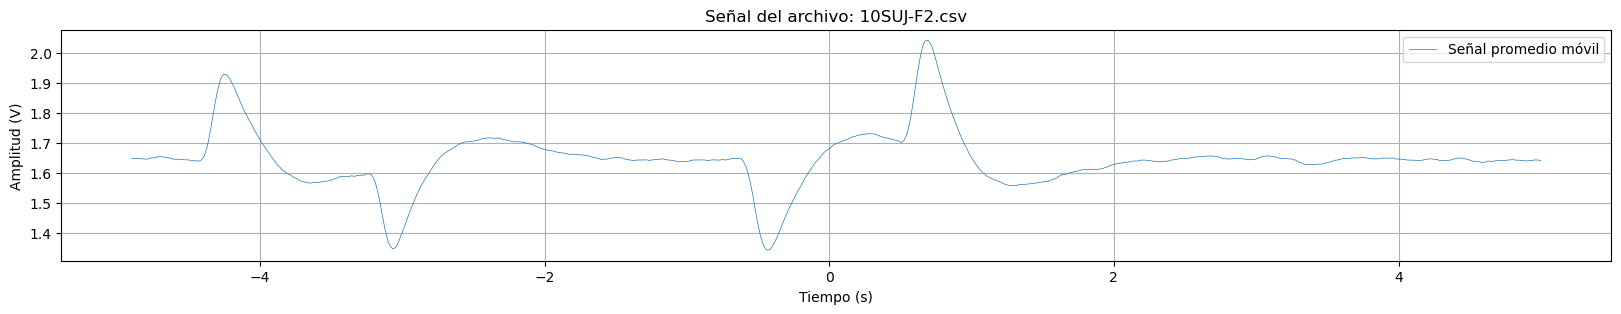

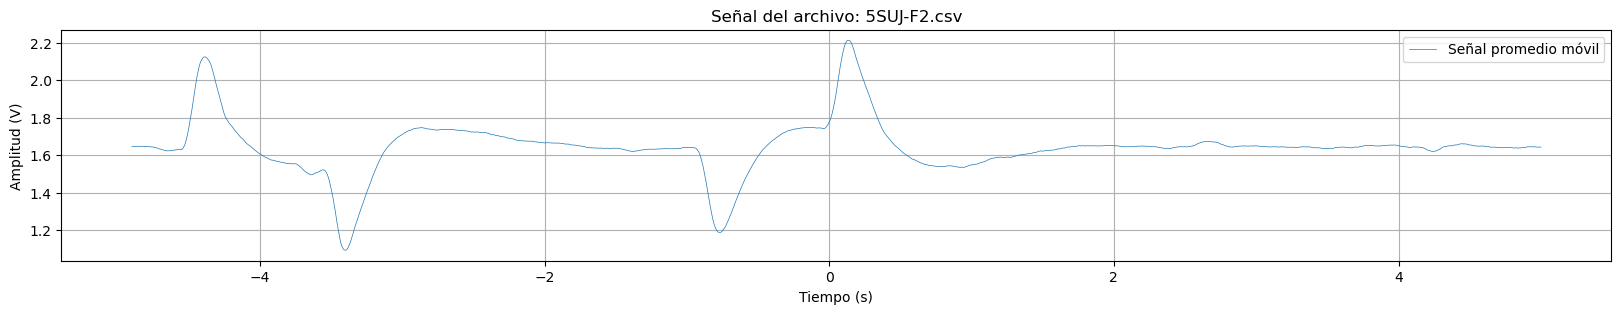

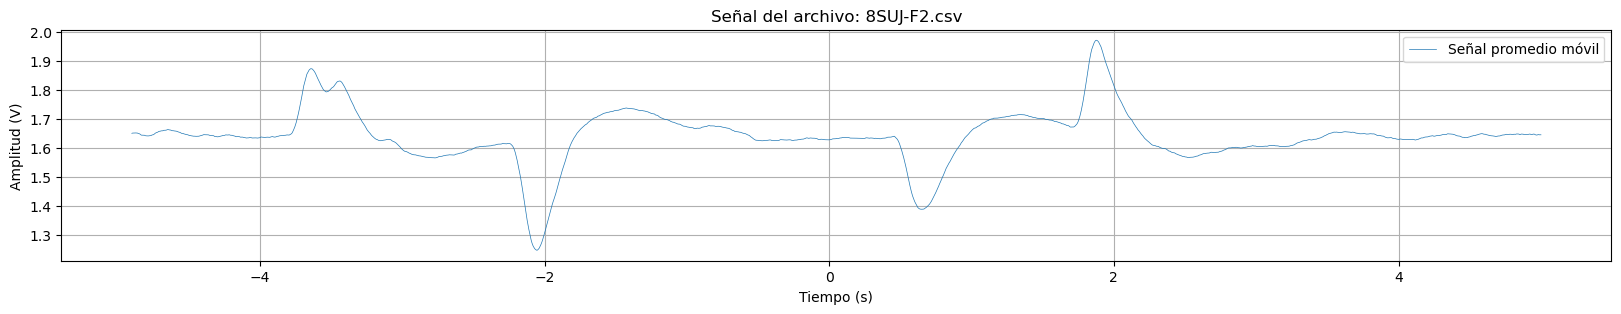

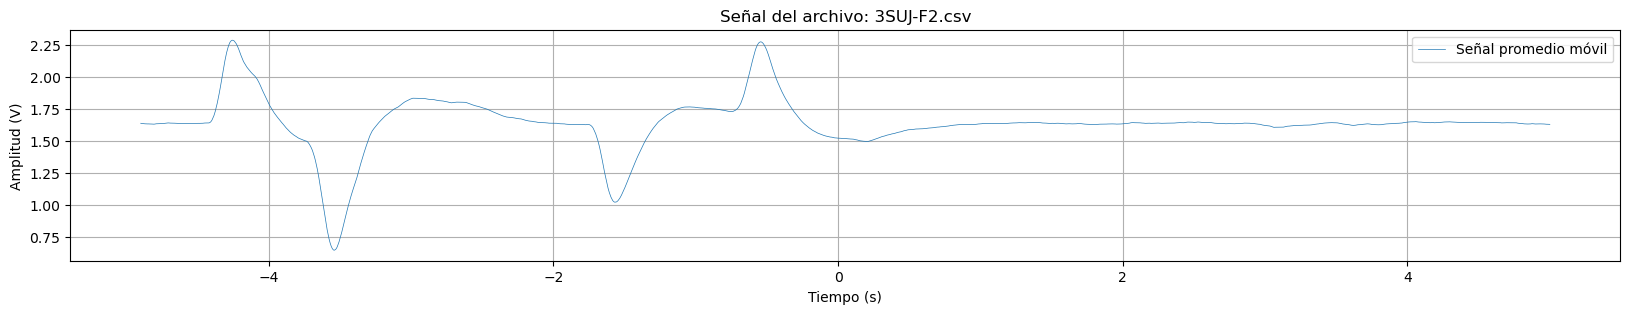

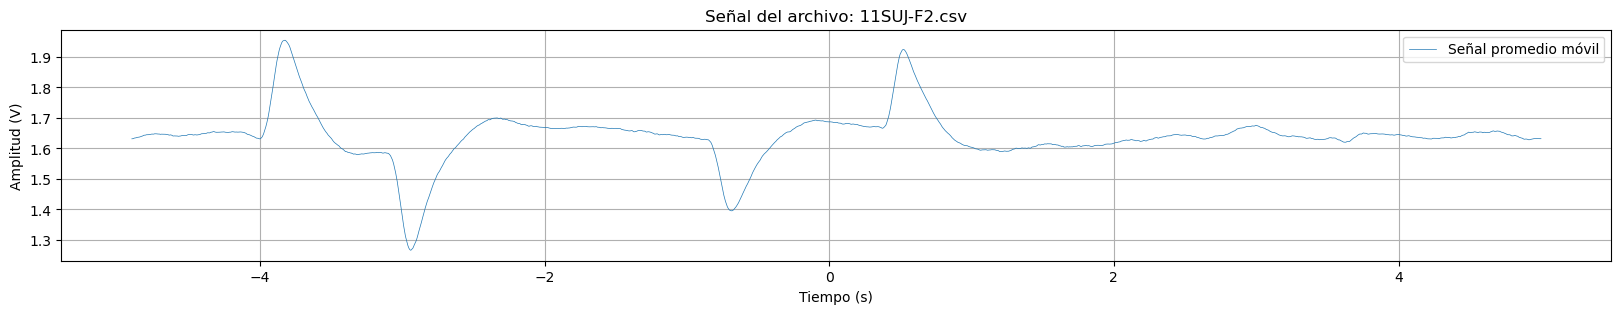

In [20]:
directorio_csv = 'CSV_F2'
ventana = 1000  

# Lista todos los archivos CSV en el directorio
archivos_csv = [archivo for archivo in os.listdir(directorio_csv) if archivo.endswith('.csv')]

for archivo in archivos_csv:
    ruta_completa = os.path.join(directorio_csv, archivo)
    # Leer cada archivo CSV, saltando las primeras 3 filas
    df = pd.read_csv(ruta_completa, skiprows=10)

    # Seleccionar la primera columna para el tiempo y la segunda para los valores de la señal
    time = df.iloc[:, 0].to_numpy()
    signal = df.iloc[:, 1].to_numpy()

    # Crear un vector de unos para la convolución que representa el promedio móvil
    vector_ones = np.ones(ventana) / ventana

    # Aplicar convolución para calcular el promedio móvil
    signal_avg = np.convolve(signal, vector_ones, mode='valid')

    # Ajustar la serie de tiempo para que coincida con la longitud de la señal filtrada
    time_avg = time[ventana-1:]

    # Crear el gráfico
    plt.figure(figsize=(20, 3))  # Puedes ajustar el tamaño del gráfico según tus necesidades
    plt.plot(time_avg, signal_avg, label='Señal promedio móvil', linewidth=0.5)  

    plt.title(f'Señal del archivo: {archivo}')
    plt.xlabel('Tiempo (s)')  # Etiqueta para el eje X
    plt.ylabel('Amplitud (V)')  # Etiqueta para el eje Y
    plt.legend()
    plt.grid(True)

    plt.show()
    plt.close()


<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: lightsteelblue ;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 10px;
              color:snow;"> Procesamiento de señales con smooth

</h2>
</div>

In [38]:
# Definición de la función de suavizado
def smooth(x, window_len=11, window='hanning'):
    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")
    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")
    if window_len < 3:
        return x
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is one of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")

    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

In [39]:
directorio_csv = 'CSV_F2'
directorio_destino = 'CSV_SMOOTH_F2'  # Carpeta donde se guardarán las señales suavizadas
ventana_suavizada = 1200  # Tamaño de la ventana para el suavizado

# Crear el directorio de destino si no existe
if not os.path.exists(directorio_destino):
    os.makedirs(directorio_destino)

archivos_csv = [archivo for archivo in os.listdir(directorio_csv) if archivo.endswith('.csv')]

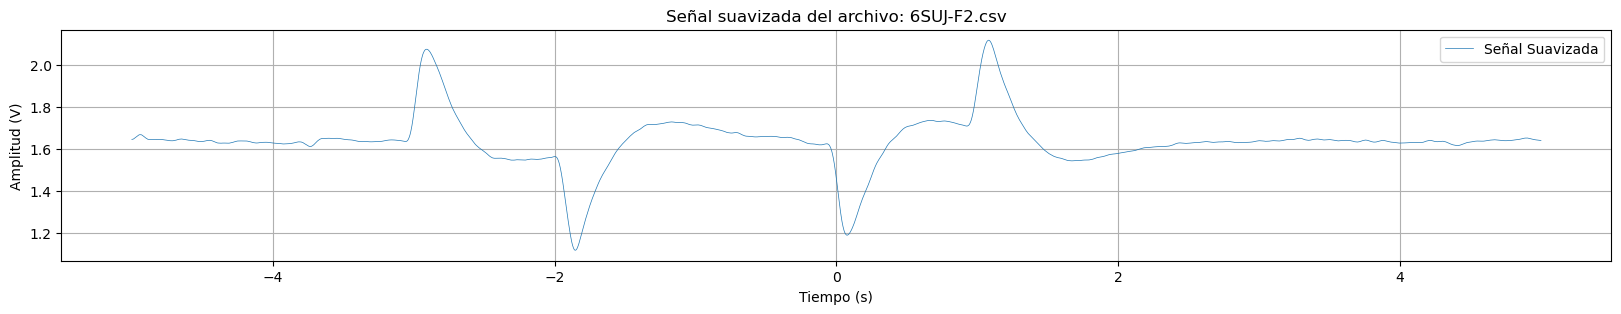

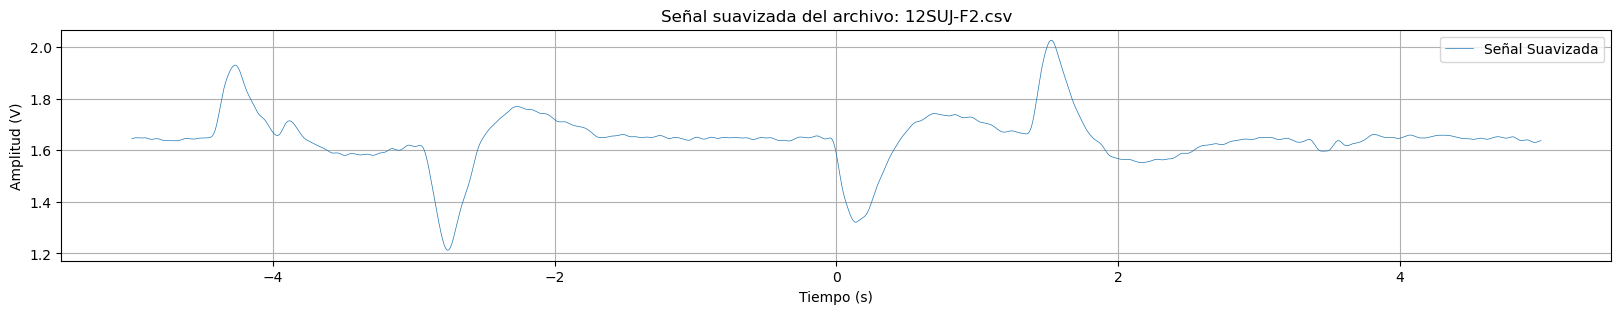

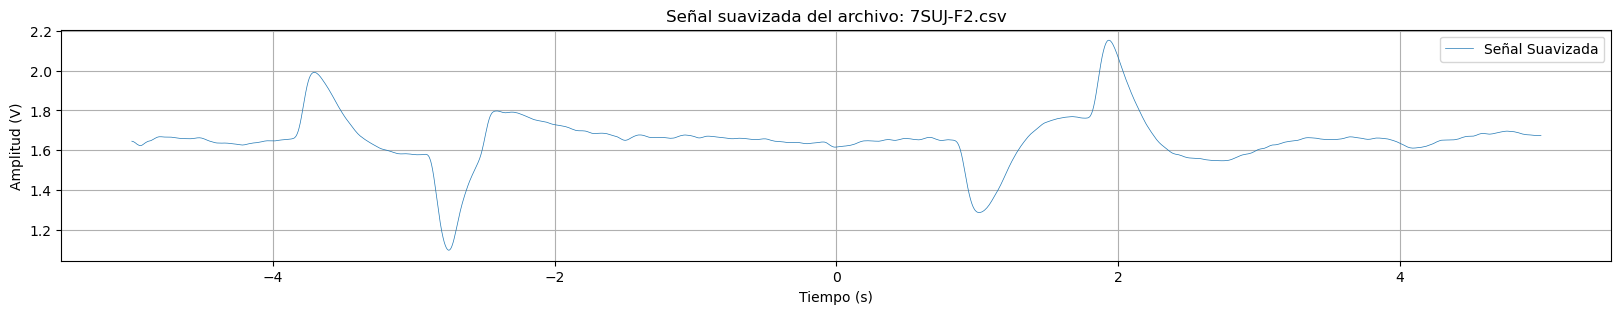

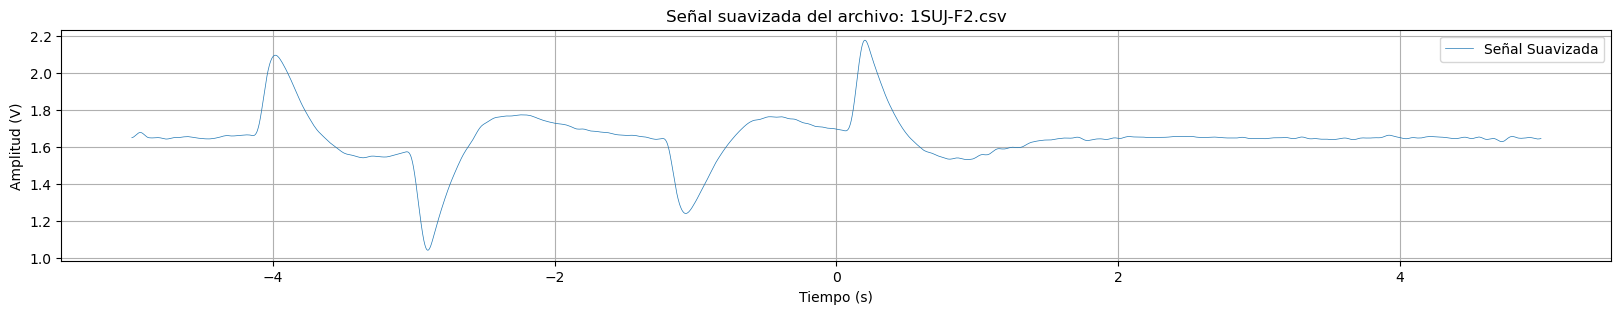

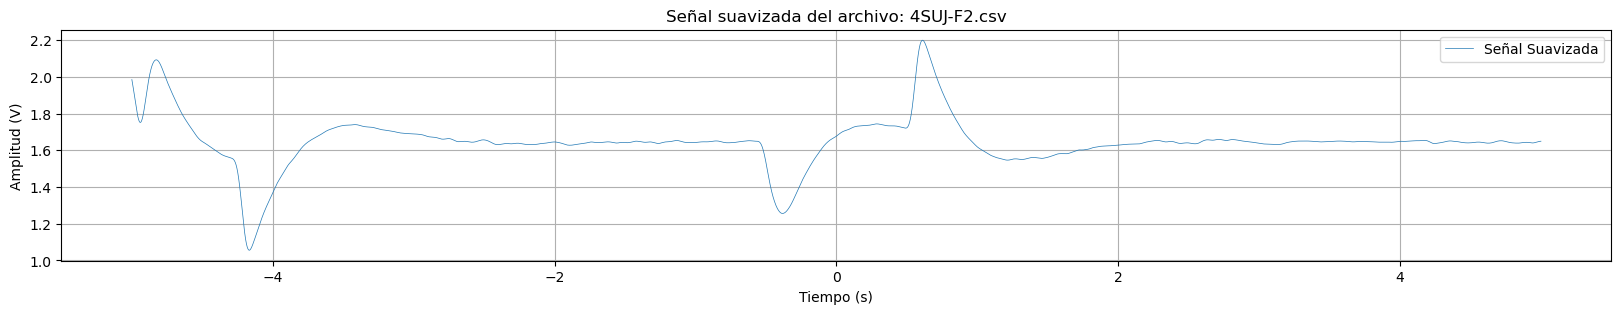

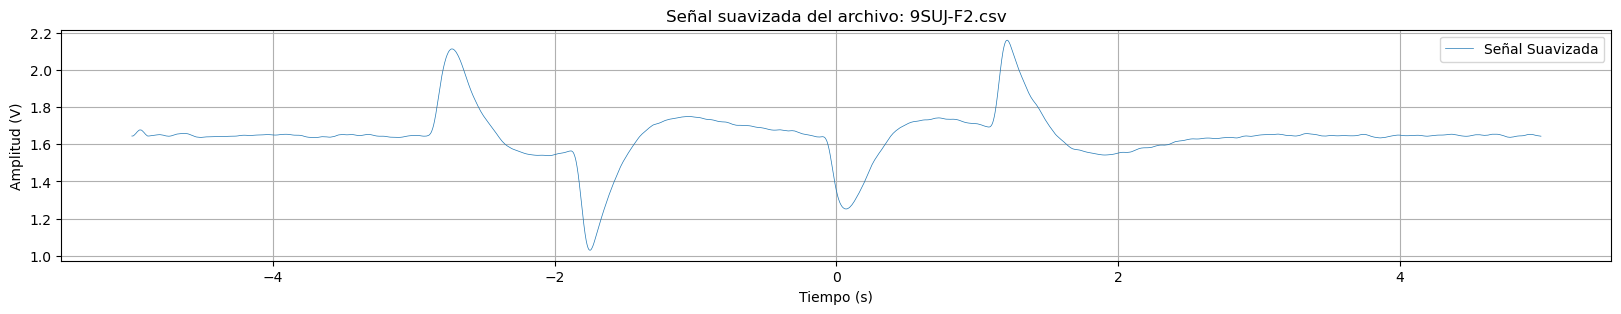

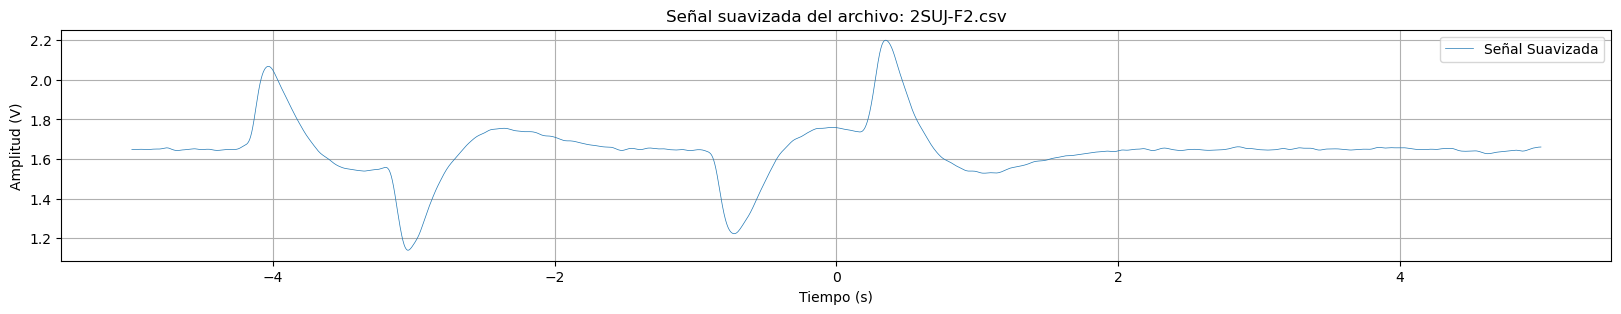

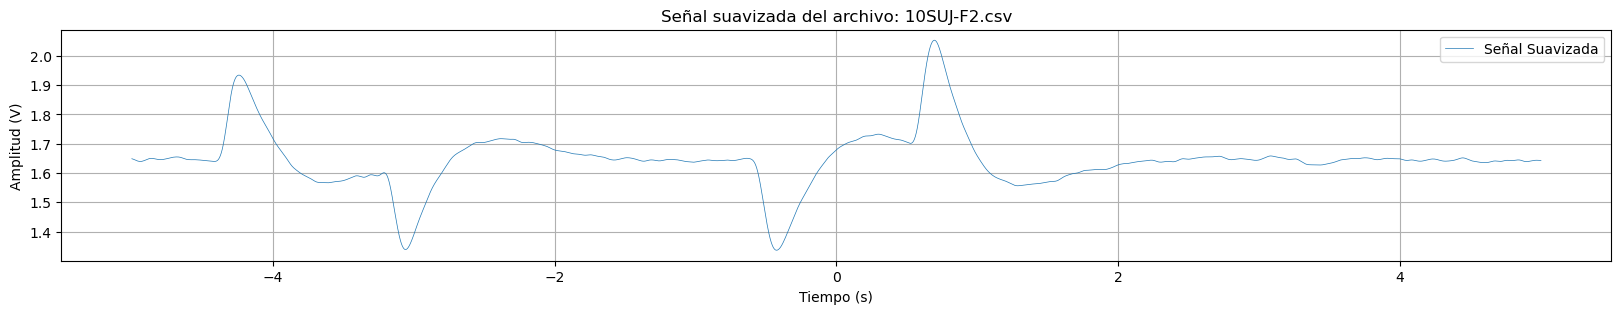

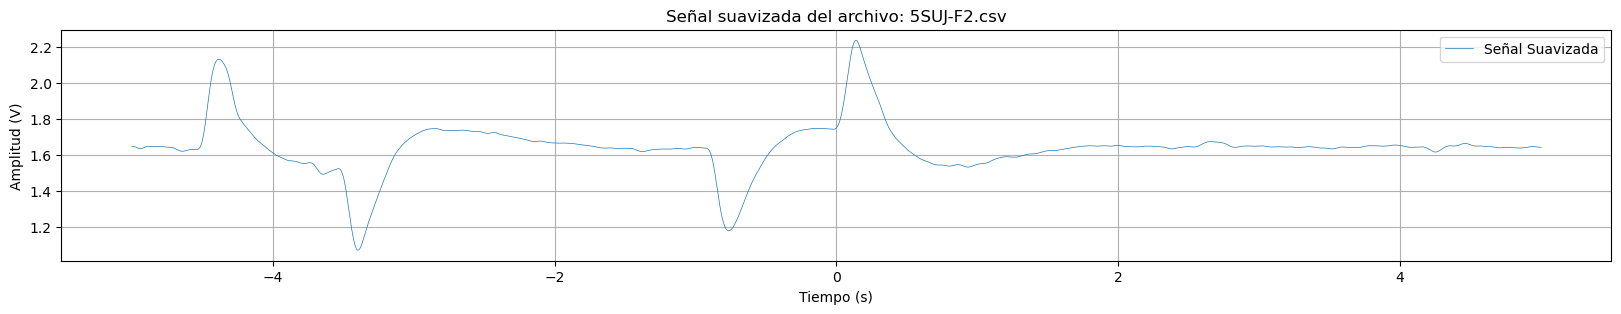

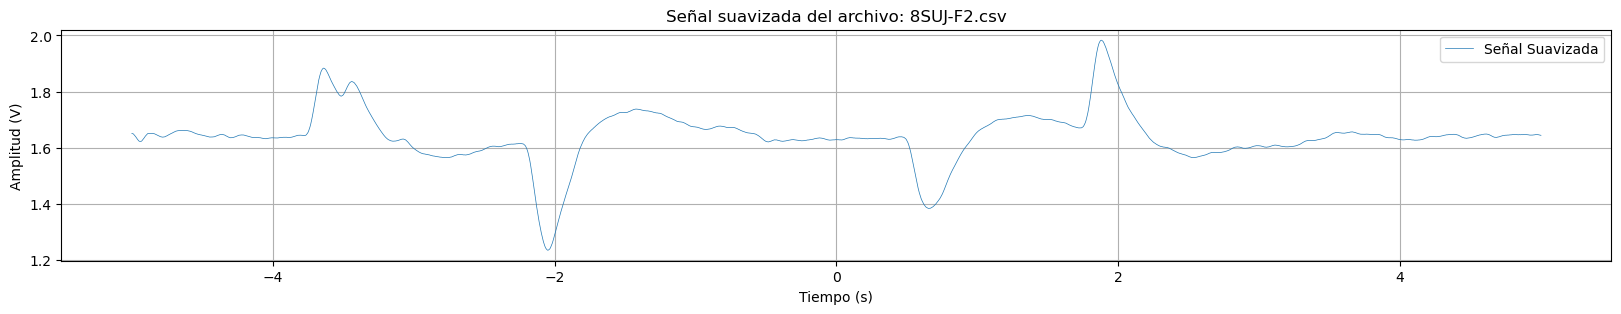

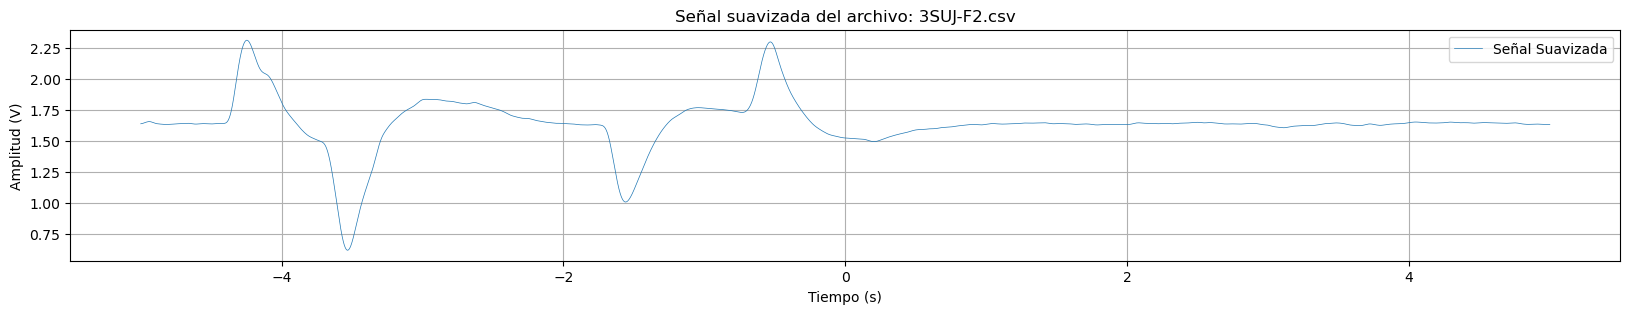

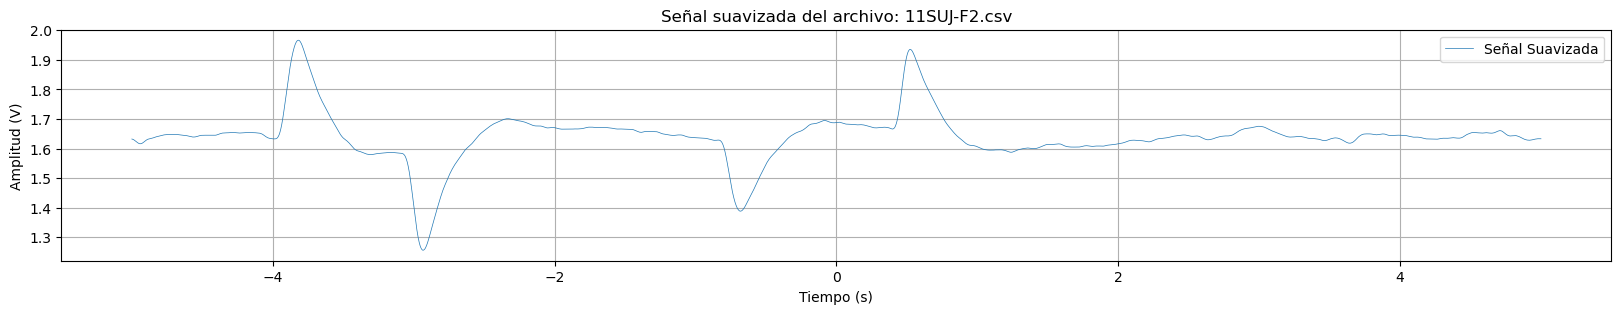

In [40]:
for nombre_archivo in archivos_csv:
    ruta_completa = os.path.join(directorio_csv, nombre_archivo)
    df = pd.read_csv(ruta_completa, skiprows=10)

    # Seleccionar la primera columna para el tiempo y la segunda para los valores de la señal
    time = df.iloc[:, 0].to_numpy()
    signal = df.iloc[:, 1].to_numpy()
    
    # Aplicar suavizado
    signal_smo = smooth(signal, ventana_suavizada)
    signal_smo = signal_smo[:-(ventana_suavizada-1)]
    
    # Ajustar la serie de tiempo para que coincida con la longitud de la señal suavizada
    time_avg = time[:len(signal_smo)]

    # Crear DataFrame con los datos suavizados
    df_suavizado = pd.DataFrame({'Tiempo': time_avg, 'Señal Suavizada': signal_smo})

    # Guardar el DataFrame suavizado en un archivo CSV en la carpeta de destino
    ruta_destino = os.path.join(directorio_destino, f'Suavizado_{nombre_archivo}')
    df_suavizado.to_csv(ruta_destino, index=False)

    # Crear y mostrar el gráfico de la señal suavizada
    plt.figure(figsize=(20, 3))
    plt.plot(time_avg, signal_smo, label='Señal Suavizada', linewidth=0.5)
    plt.title(f'Señal suavizada del archivo: {nombre_archivo}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (V)')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()


<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: lightsteelblue ;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 10px;
              color:snow;"> Detección de puntos referentes en señales

</h2>
</div>

In [41]:
from scipy.signal import find_peaks

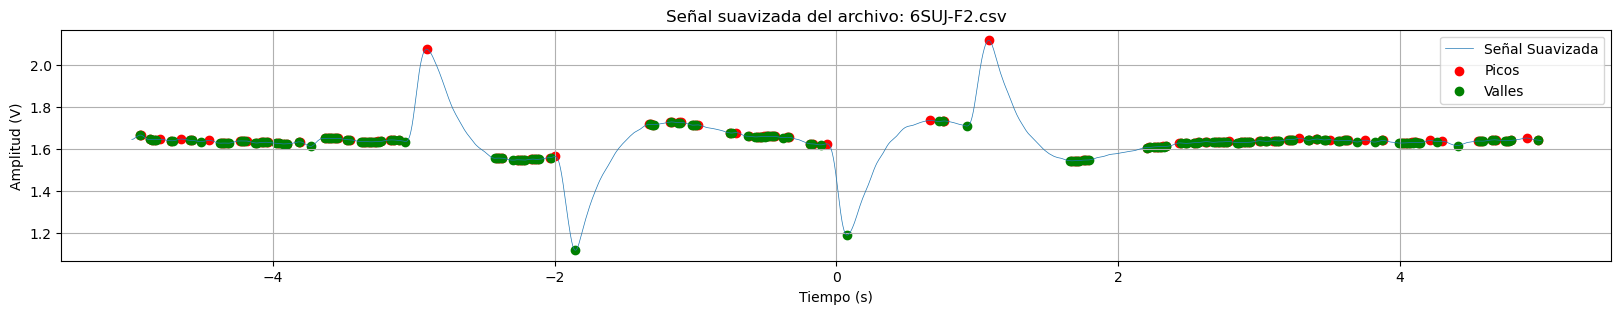

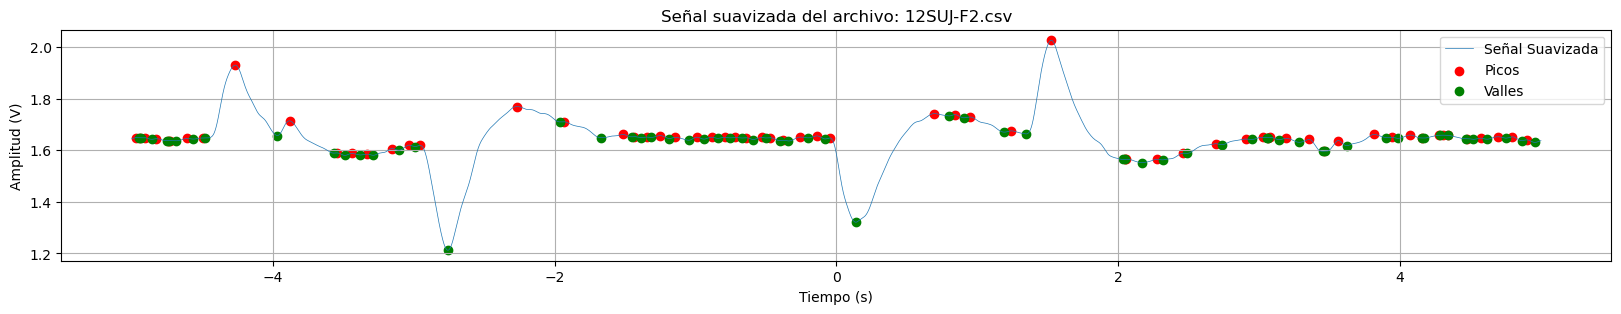

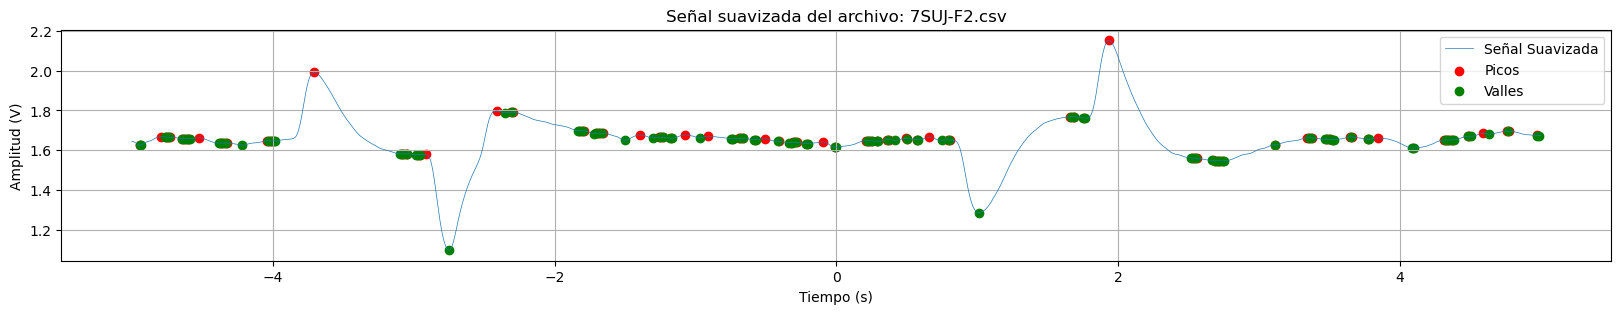

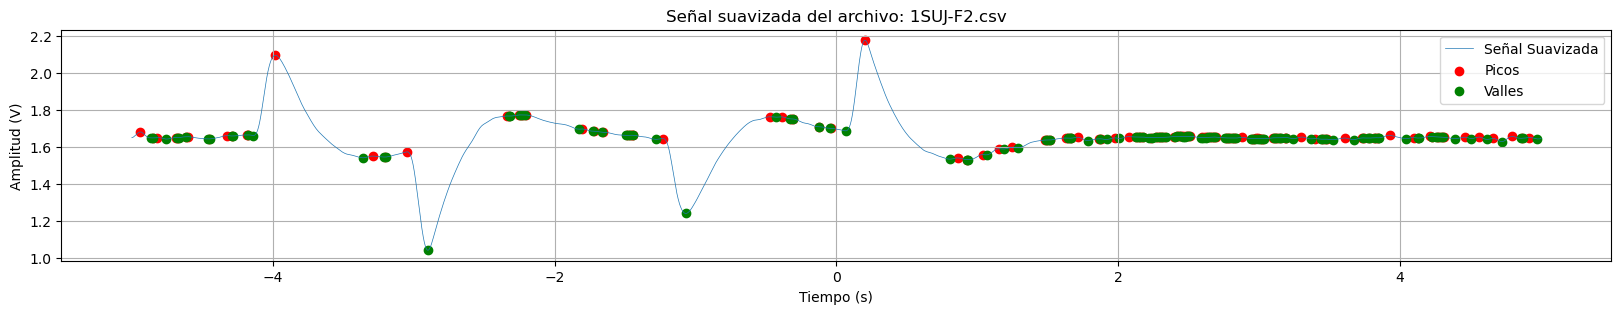

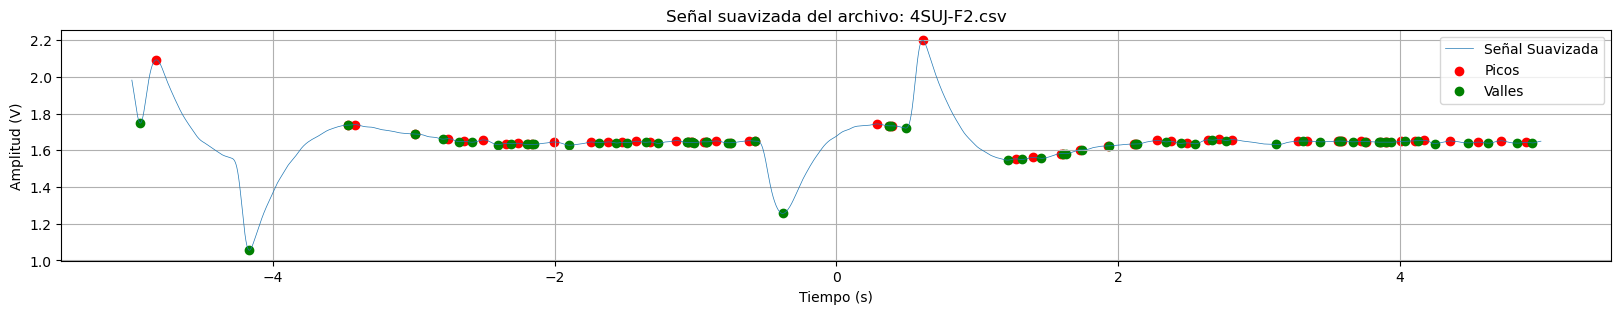

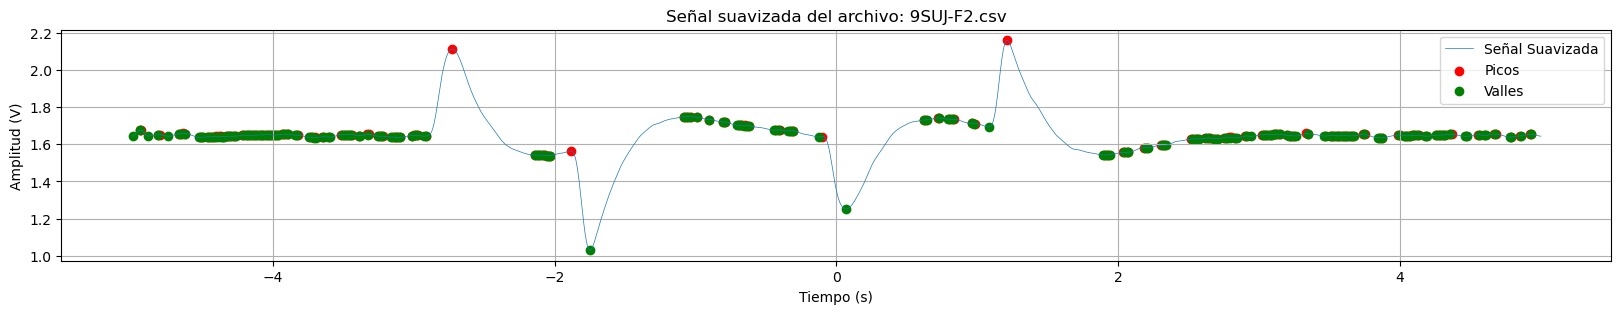

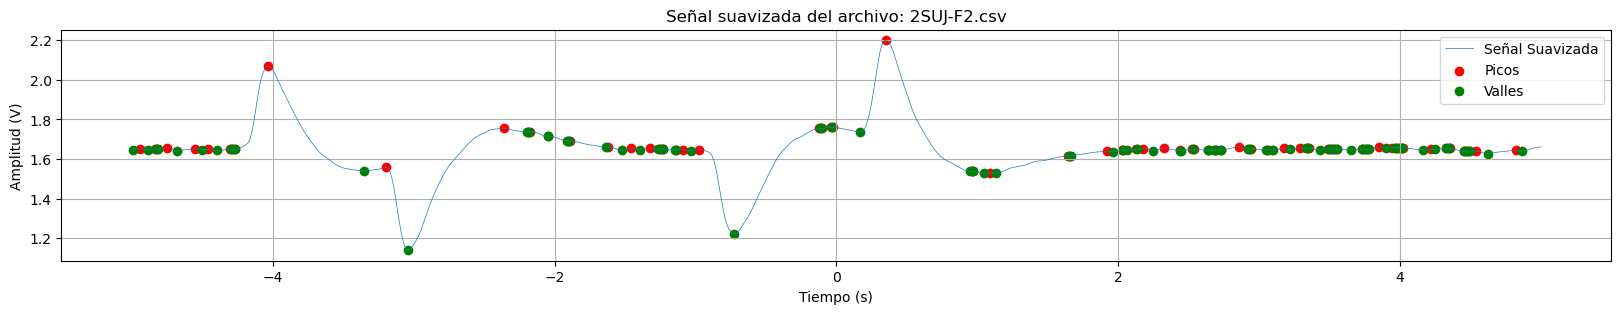

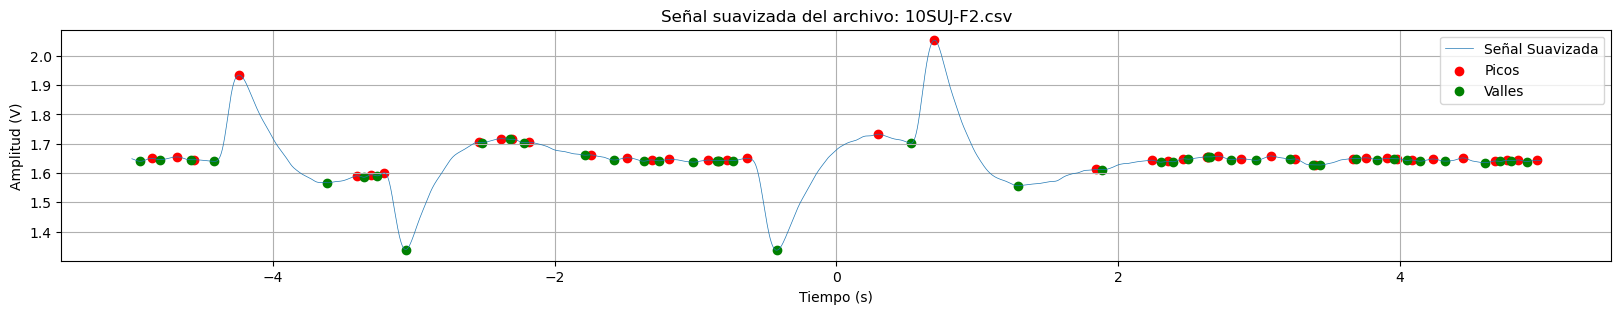

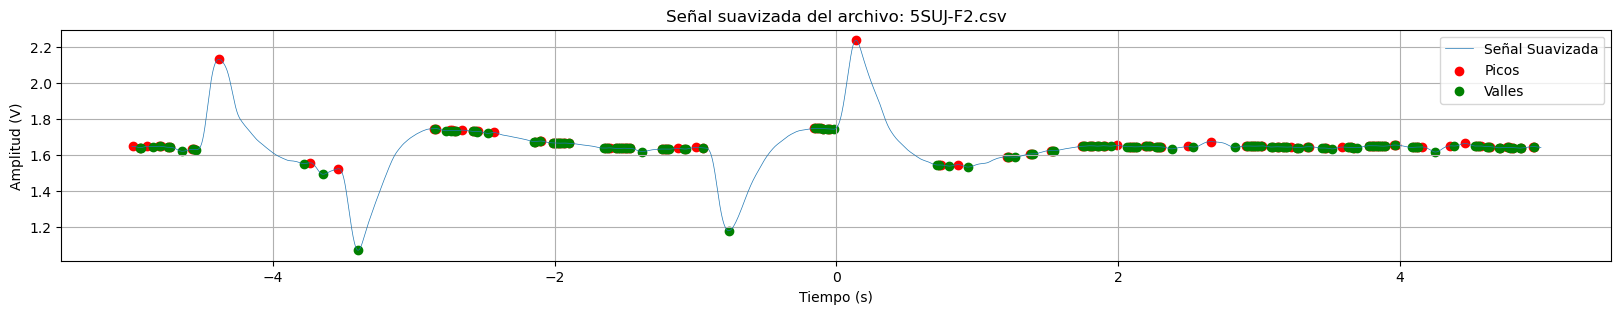

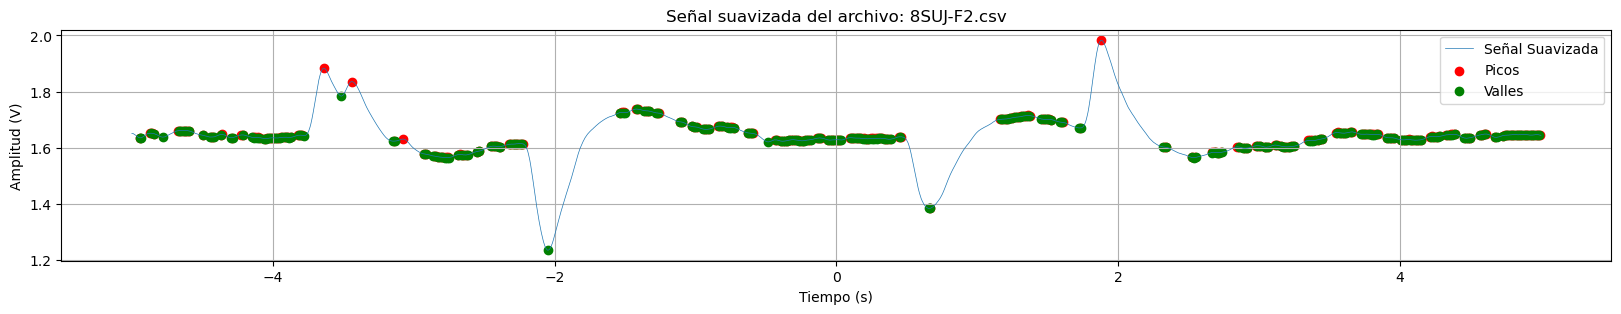

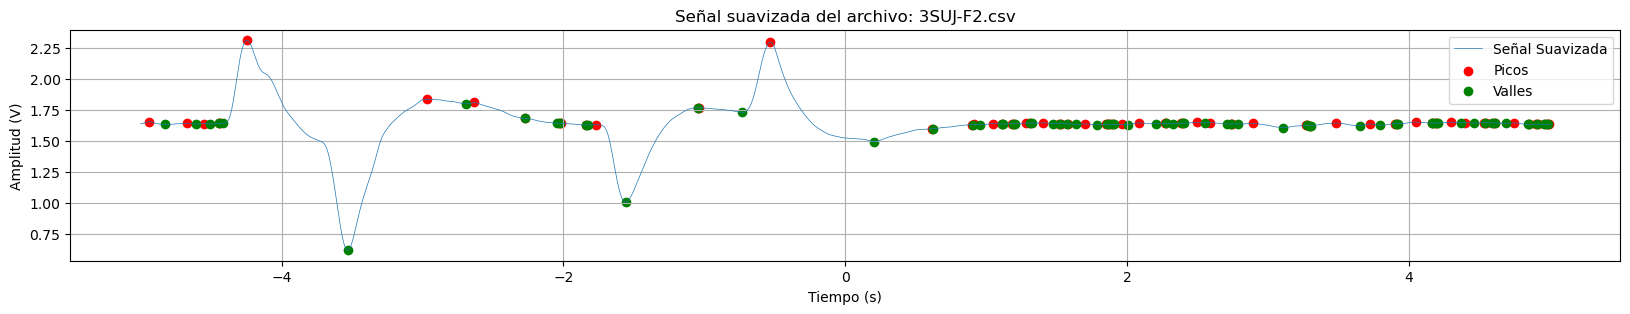

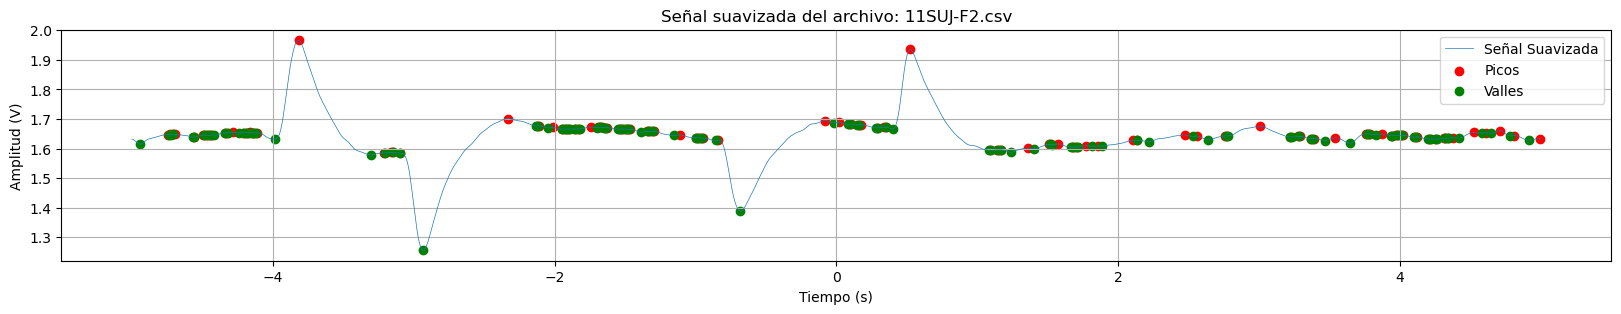

In [42]:
for nombre_archivo in archivos_csv:
    ruta_completa = os.path.join(directorio_csv, nombre_archivo)
    df = pd.read_csv(ruta_completa, skiprows=3)
    time = df.iloc[:, 0].to_numpy()
    signal = df.iloc[:, 1].to_numpy()
    
    # Aplicar suavizado
    signal_smo = smooth(signal, ventana_suavizada)
    signal_smo = signal_smo[:-(ventana_suavizada-1)]
    time_avg = time[:len(signal_smo)]
    
    # Detectar picos y valles
    peaks, _ = find_peaks(signal_smo, height=None)  # Ajusta los parámetros según sea necesario
    valleys, _ = find_peaks(-signal_smo, height=None)

    # Crear DataFrame con los datos suavizados y las detecciones
    df_suavizado = pd.DataFrame({'Tiempo': time_avg, 'Señal Suavizada': signal_smo})
    df_suavizado['Picos'] = np.nan
    df_suavizado.loc[peaks, 'Picos'] = signal_smo[peaks]
    df_suavizado['Valles'] = np.nan
    df_suavizado.loc[valleys, 'Valles'] = signal_smo[valleys]
    
    # Guardar el DataFrame suavizado en un archivo CSV en la carpeta de destino
    ruta_destino = os.path.join(directorio_destino, f'Suavizado_{nombre_archivo}')
    df_suavizado.to_csv(ruta_destino, index=False)
    
    # Crear y mostrar el gráfico de la señal suavizada con picos y valles
    plt.figure(figsize=(20, 3))
    plt.plot(df_suavizado['Tiempo'], df_suavizado['Señal Suavizada'], label='Señal Suavizada', linewidth=0.5)
    plt.scatter(df_suavizado['Tiempo'][peaks], df_suavizado['Señal Suavizada'][peaks], color='red', label='Picos')
    plt.scatter(df_suavizado['Tiempo'][valleys], df_suavizado['Señal Suavizada'][valleys], color='green', label='Valles')
    plt.title(f'Señal suavizada del archivo: {nombre_archivo}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (V)')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()

<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: lightsteelblue ;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 10px;
              color:snow;"> Post-Procesamiento

</h2>
</div>

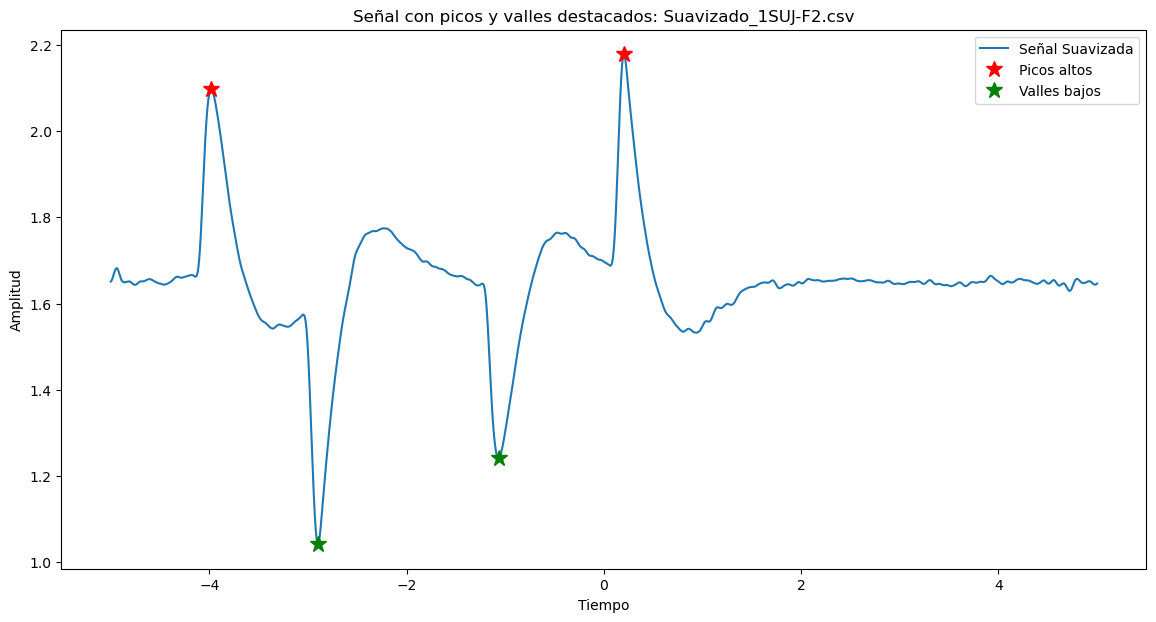

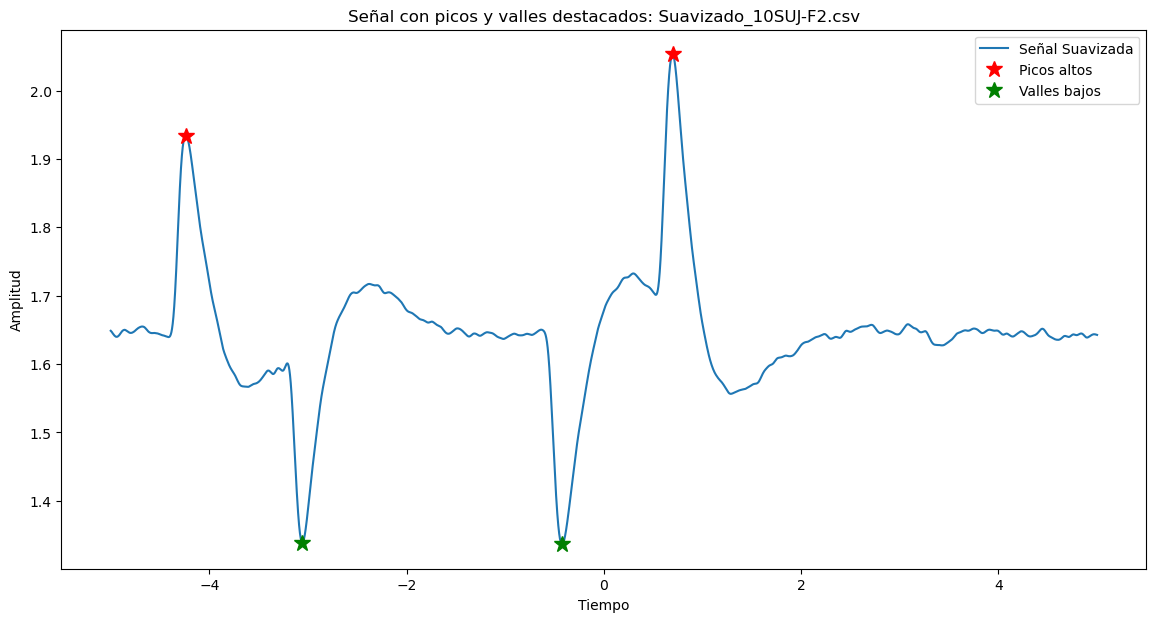

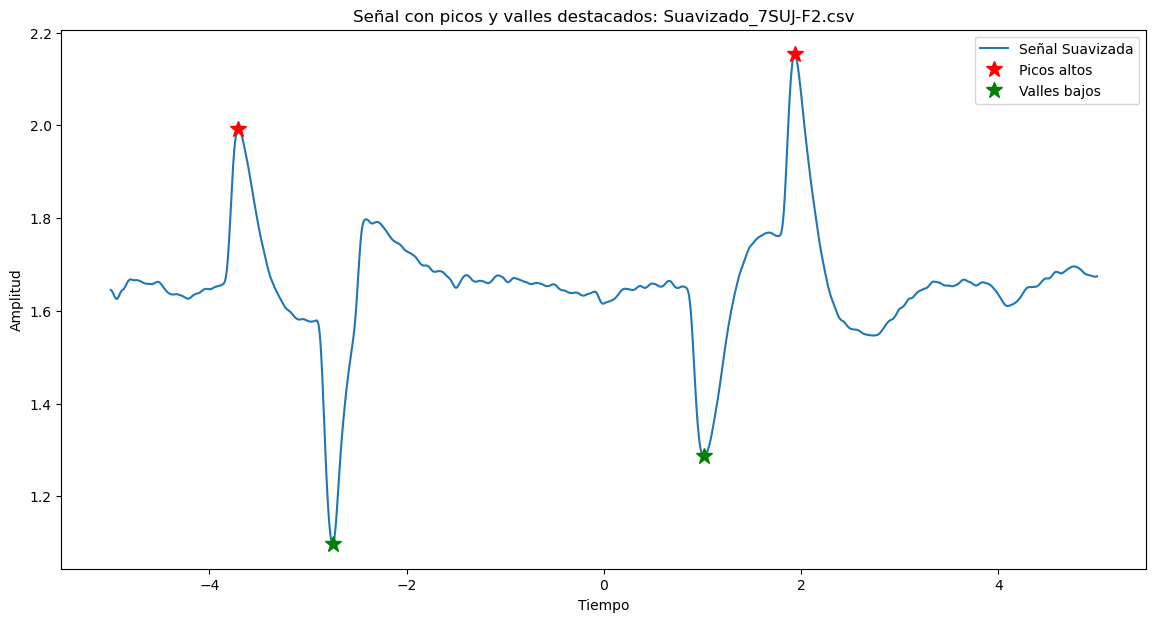

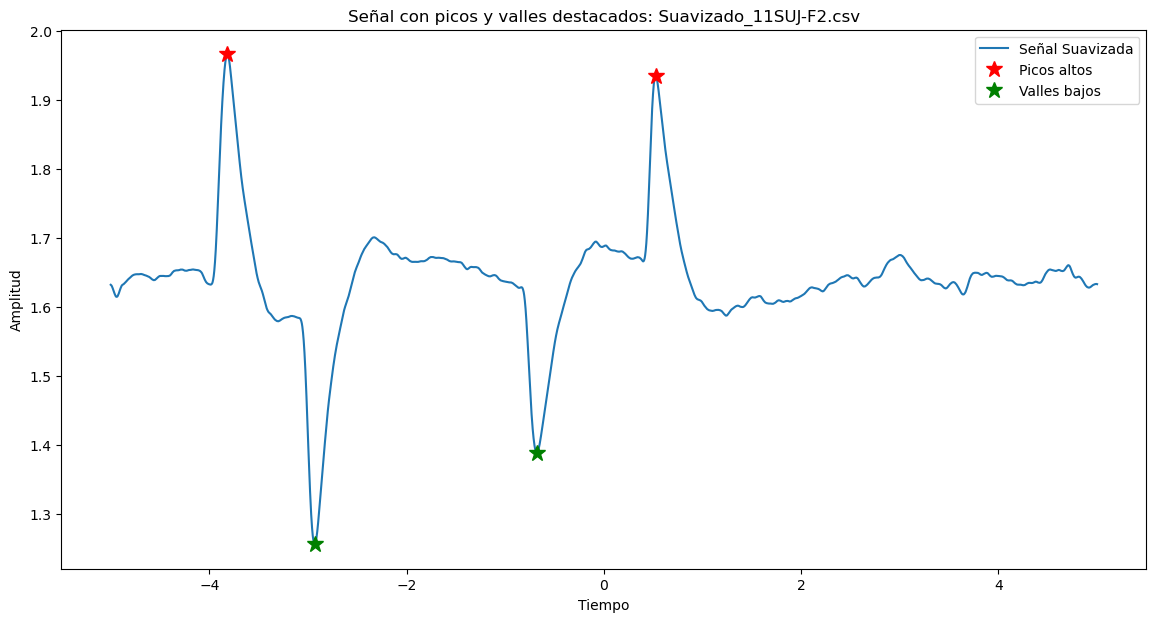

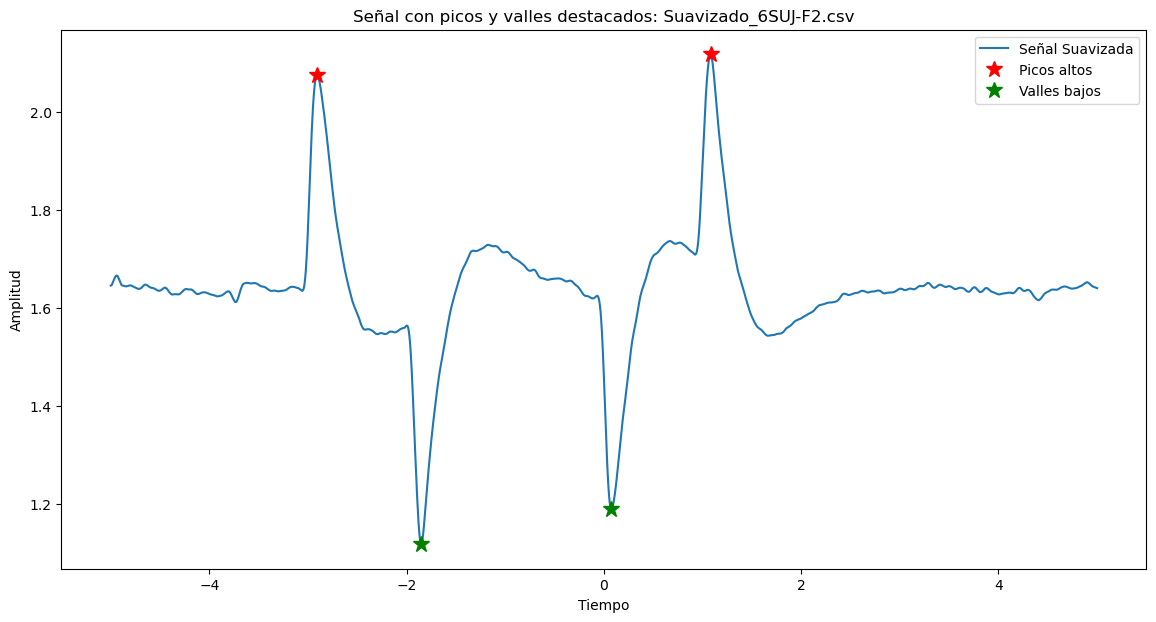

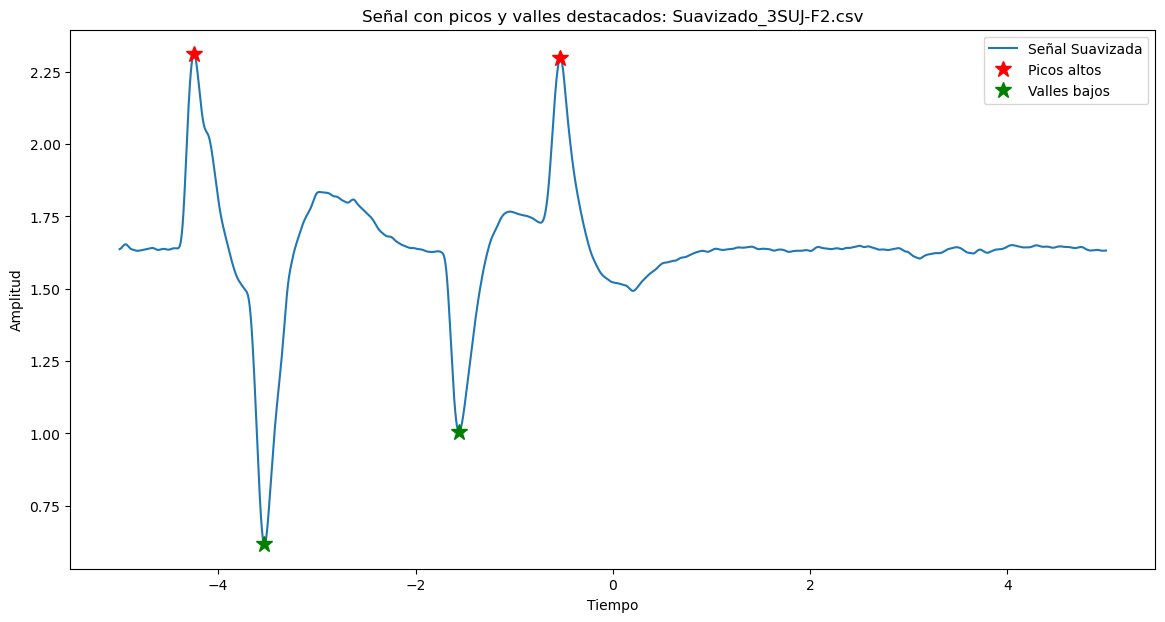

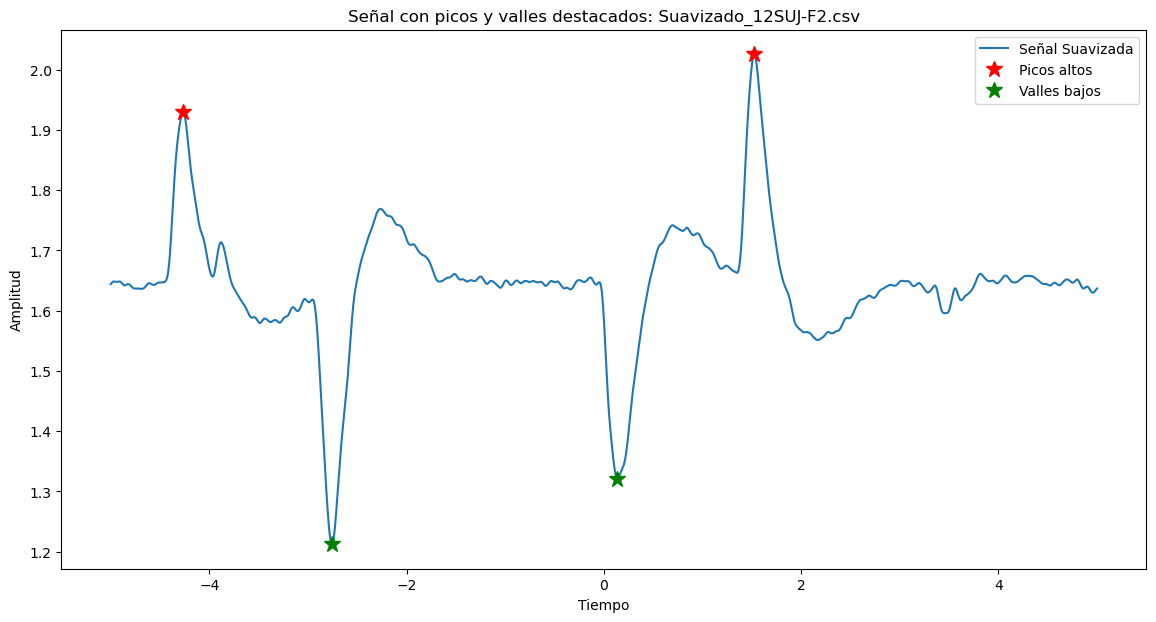

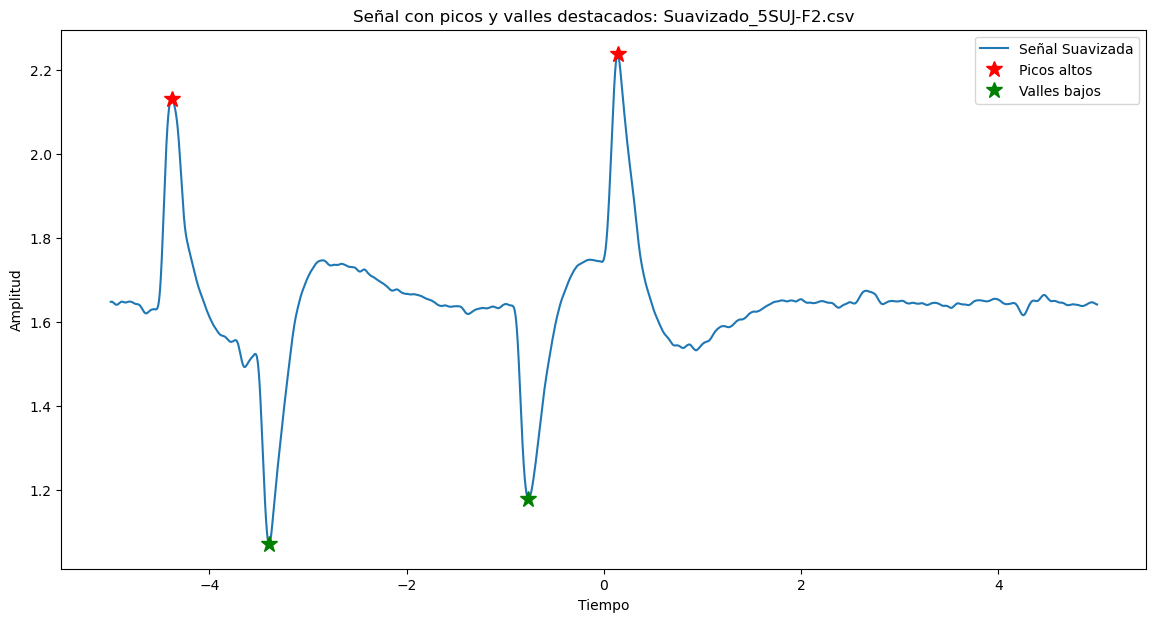

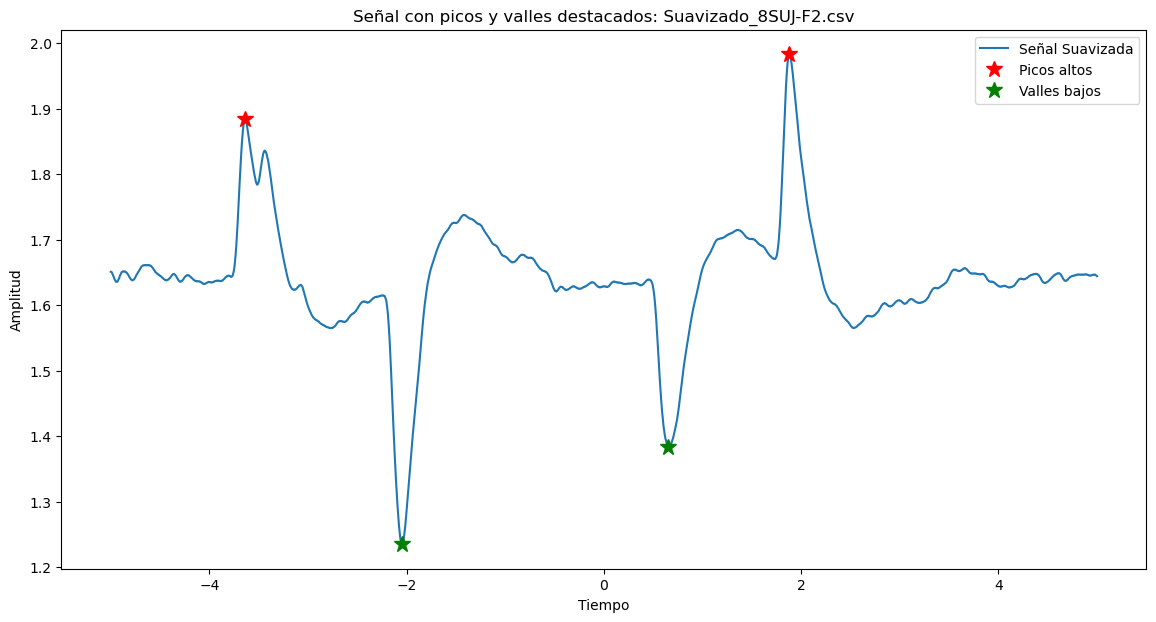

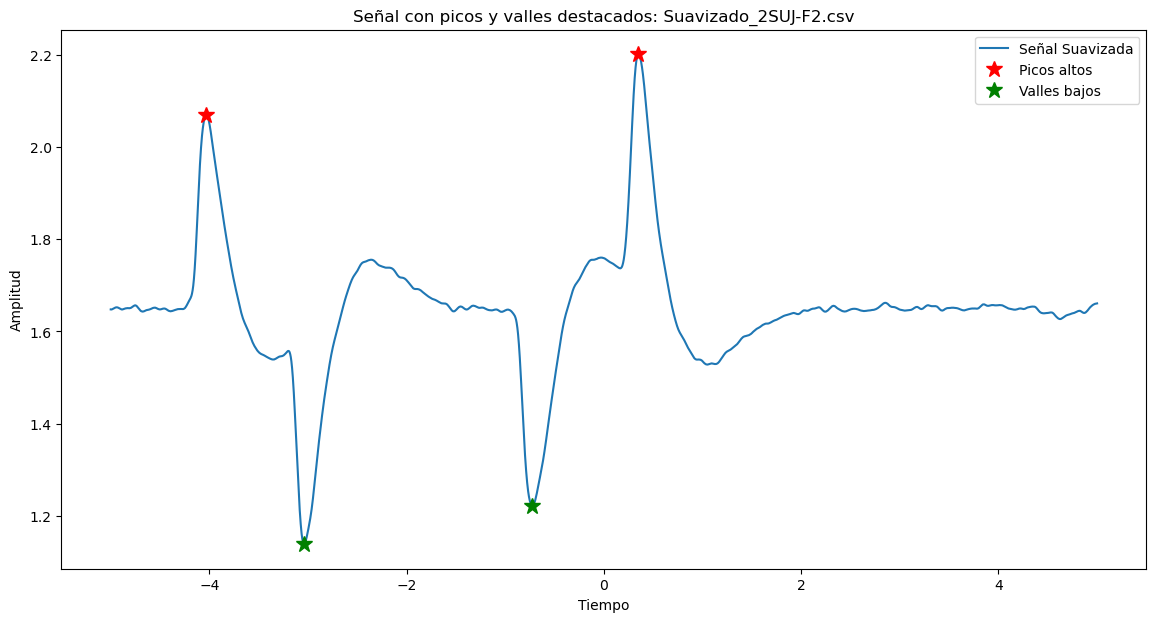

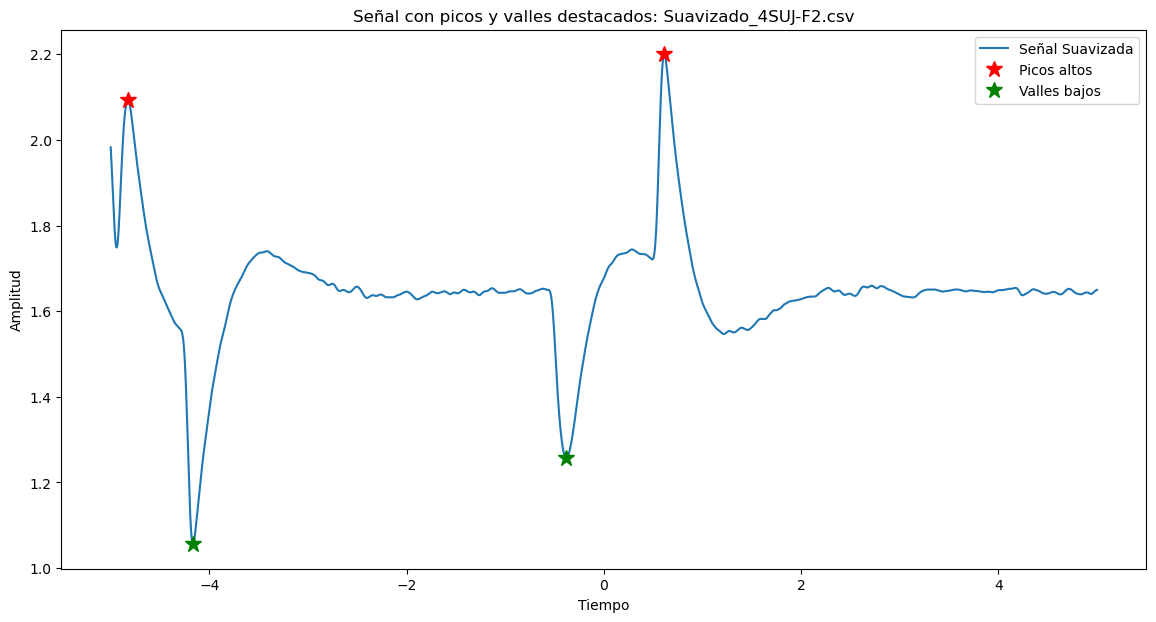

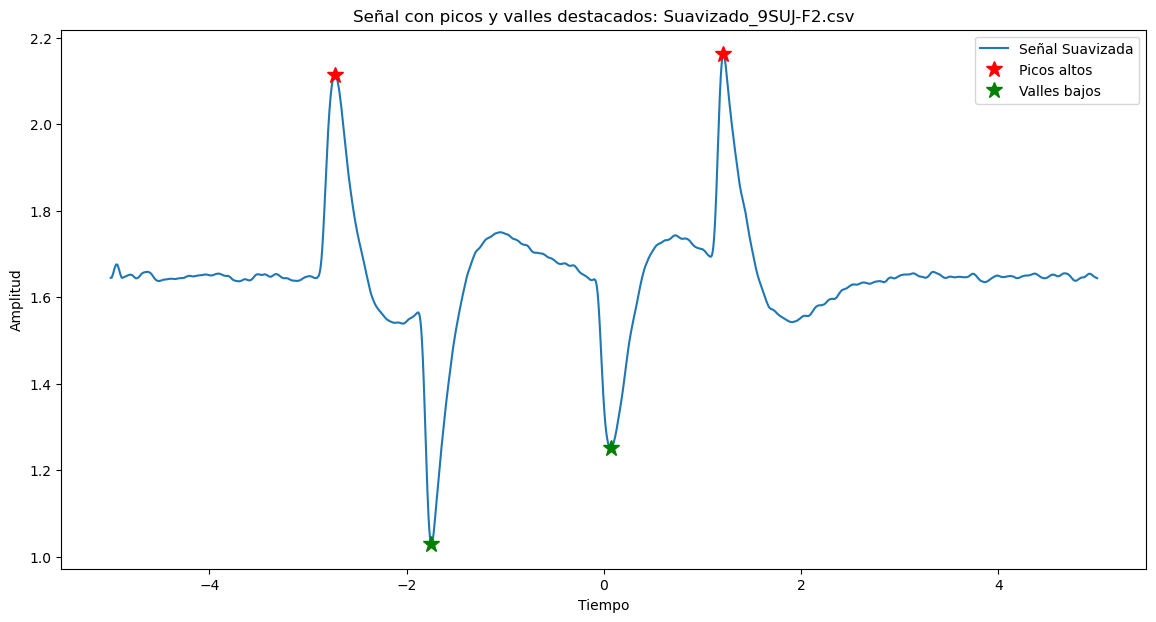

In [43]:
# Definición del directorio que contiene los archivos CSV
directorio_csv = 'CSV_SMOOTH_F2'

# Iterar sobre cada archivo CSV en el directorio especificado
for nombre_archivo in os.listdir(directorio_csv):
    if nombre_archivo.endswith('.csv'):
        ruta_completa = os.path.join(directorio_csv, nombre_archivo)
        df = pd.read_csv(ruta_completa)

        # Asegúrate de que la columna 'Señal Suavizada' existe en el DataFrame
        if 'Señal Suavizada' not in df.columns:
            print(f"El archivo {nombre_archivo} no contiene la columna 'Señal Suavizada'.")
            continue

        # Convertir la columna 'Señal Suavizada' a numérico y descartar NaNs
        df['Señal Suavizada'] = pd.to_numeric(df['Señal Suavizada'], errors='coerce')
        df.dropna(subset=['Señal Suavizada'], inplace=True)

        # Extraer la señal y el tiempo
        signal = df['Señal Suavizada'].values
        time = df['Tiempo'].values if 'Tiempo' in df.columns else np.arange(len(signal))

        # Configurar los parámetros para la detección de picos
        prominencia = np.max(signal) * 0.12
        # Establecer la altura mínima para los picos justo por encima de 1.8V
        altura_minima_picos = 1.85
        altura_minima_valles = np.median(-signal) - np.std(-signal)
        distancia_minima = 100
        
        # Detectar picos y valles
        picos_indices, _ = find_peaks(signal, prominence=prominencia, height=altura_minima_picos, distance=distancia_minima)
        valles_indices, _ = find_peaks(-signal, prominence=prominencia, height=altura_minima_valles, distance=distancia_minima)

        # Visualización de la señal con picos y valles marcados
        plt.figure(figsize=(14, 7))
        plt.plot(time, signal, label='Señal Suavizada')
        plt.plot(time[picos_indices], signal[picos_indices], 'r*', markersize=12, label='Picos altos')
        plt.plot(time[valles_indices], signal[valles_indices], 'g*', markersize=12, label='Valles bajos')
        plt.legend()
        plt.title(f'Señal con picos y valles destacados: {nombre_archivo}')
        plt.xlabel('Tiempo')
        plt.ylabel('Amplitud')
        plt.show()


<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: lightsteelblue ;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 10px;
              color:snow;"> Procesamiento y codificación de las señales

</h2>
</div>

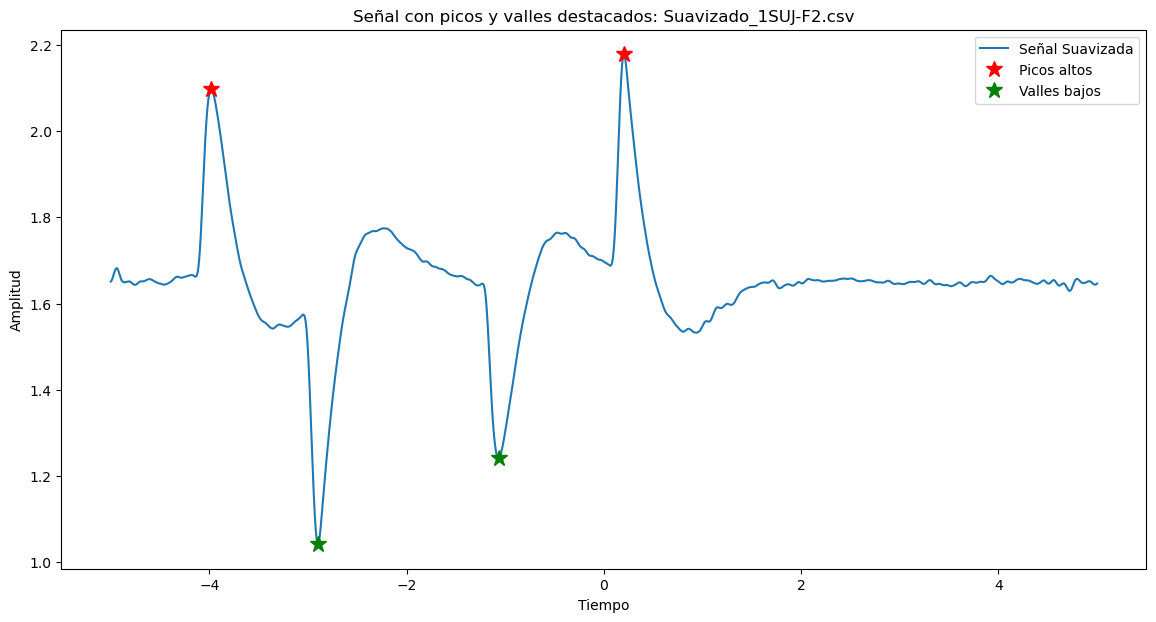

Codificación para el archivo Suavizado_1SUJ-F2.csv: U D D U


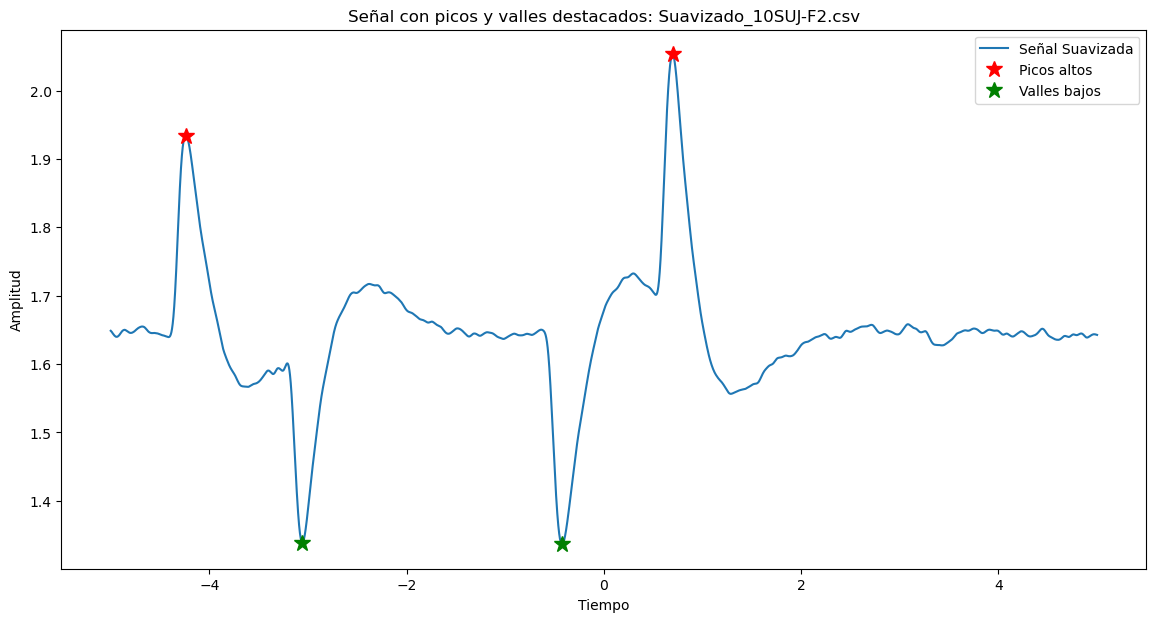

Codificación para el archivo Suavizado_10SUJ-F2.csv: U D D U


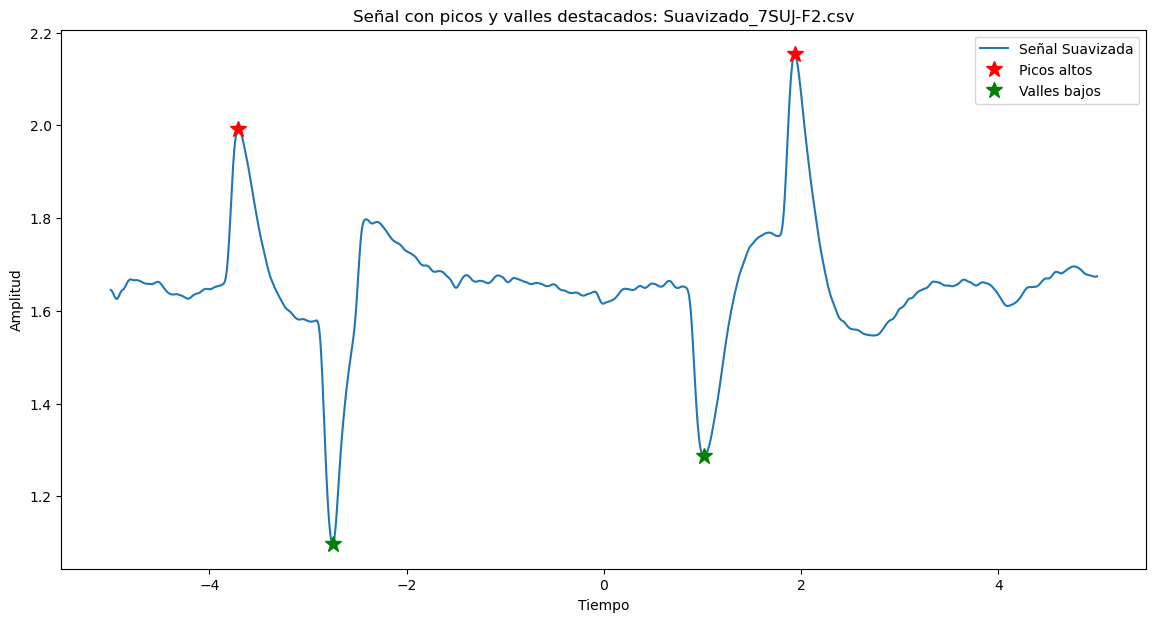

Codificación para el archivo Suavizado_7SUJ-F2.csv: U D D U


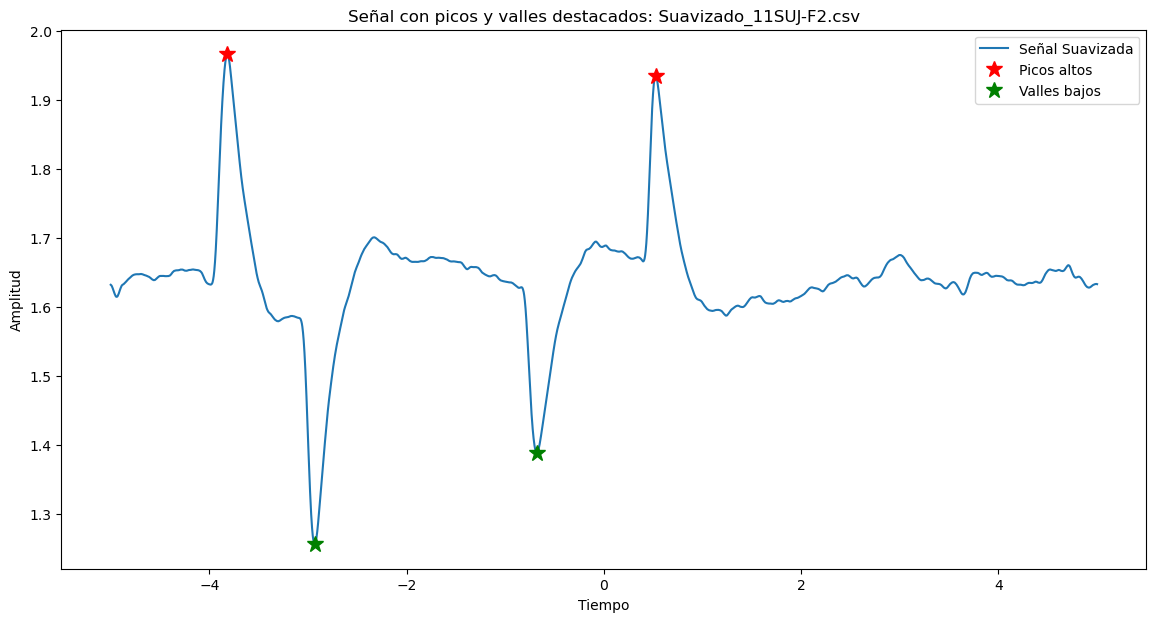

Codificación para el archivo Suavizado_11SUJ-F2.csv: U D D U


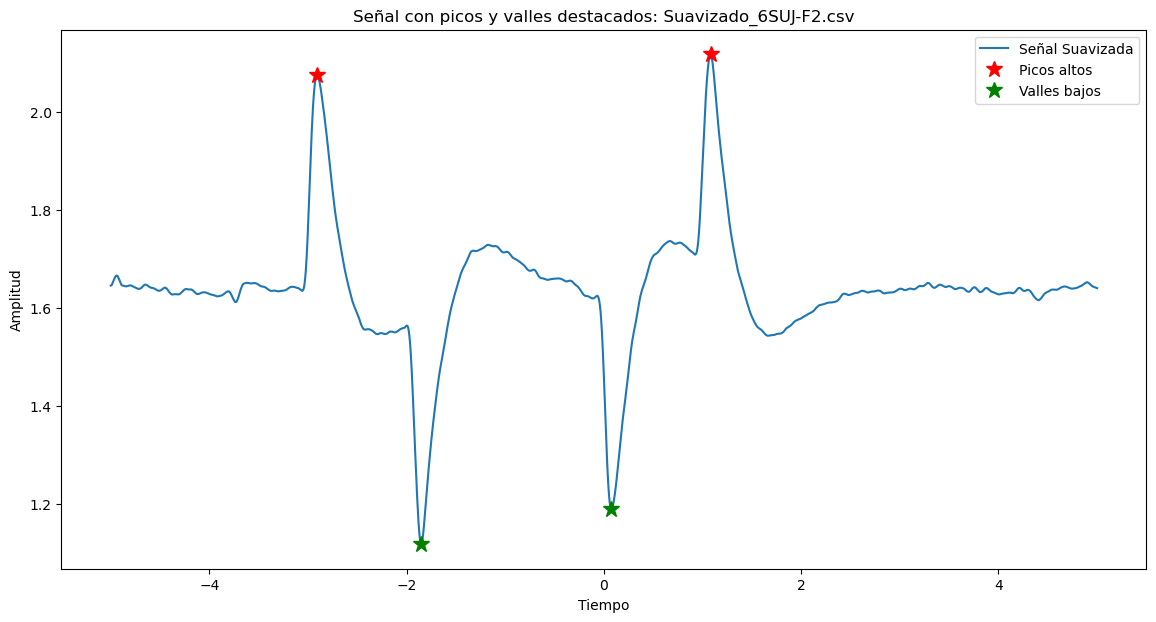

Codificación para el archivo Suavizado_6SUJ-F2.csv: U D D U


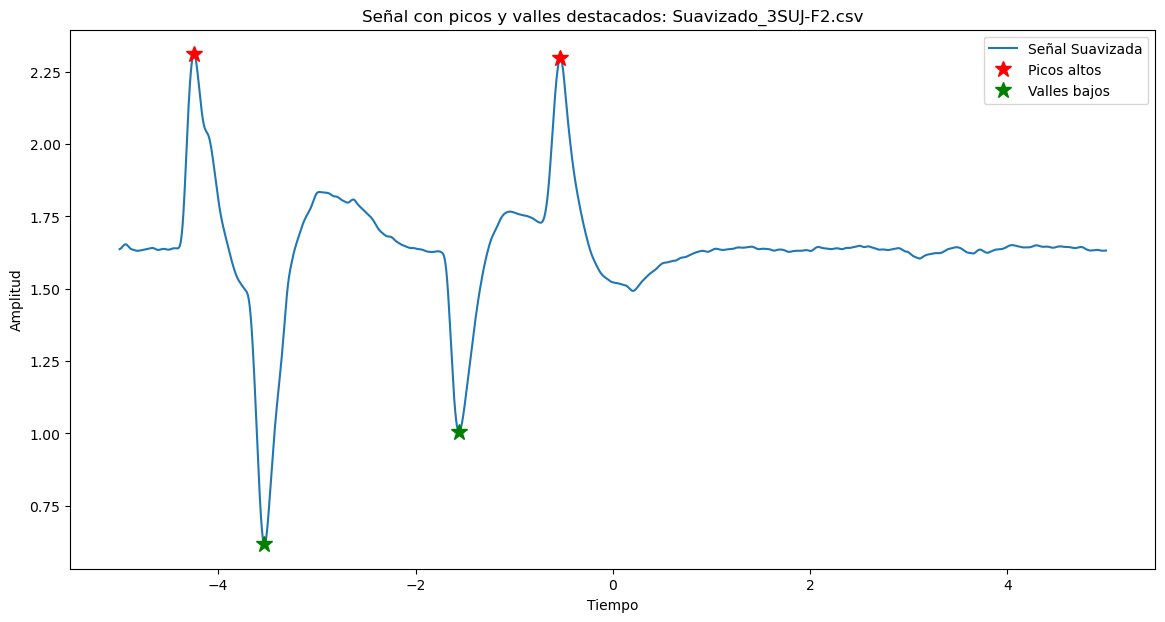

Codificación para el archivo Suavizado_3SUJ-F2.csv: U D D U


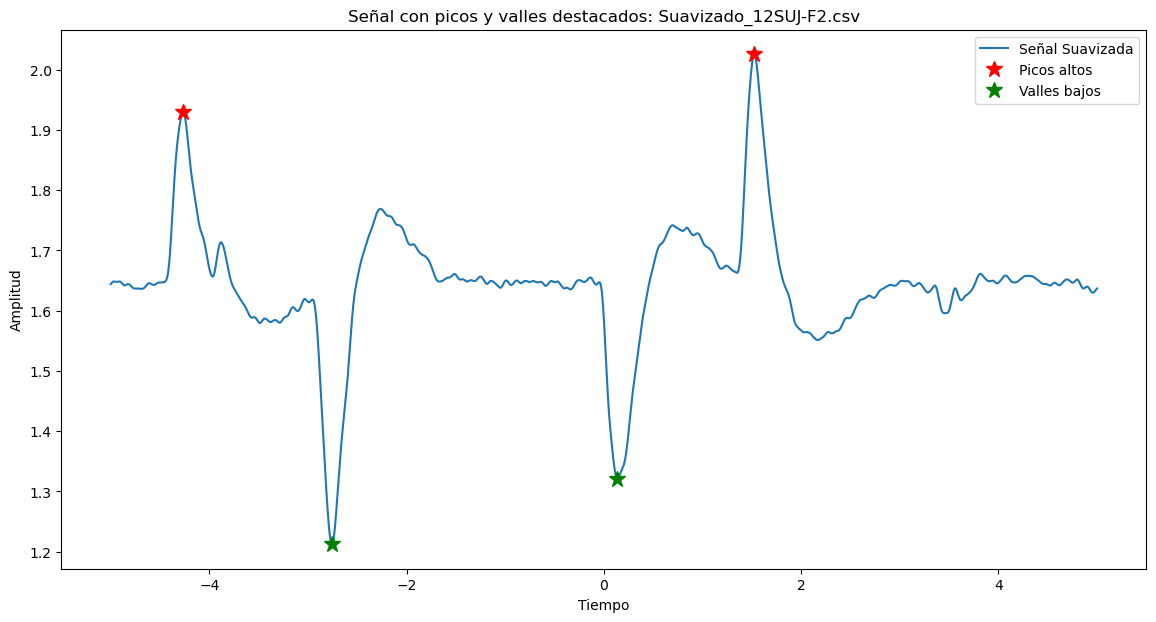

Codificación para el archivo Suavizado_12SUJ-F2.csv: U D D U


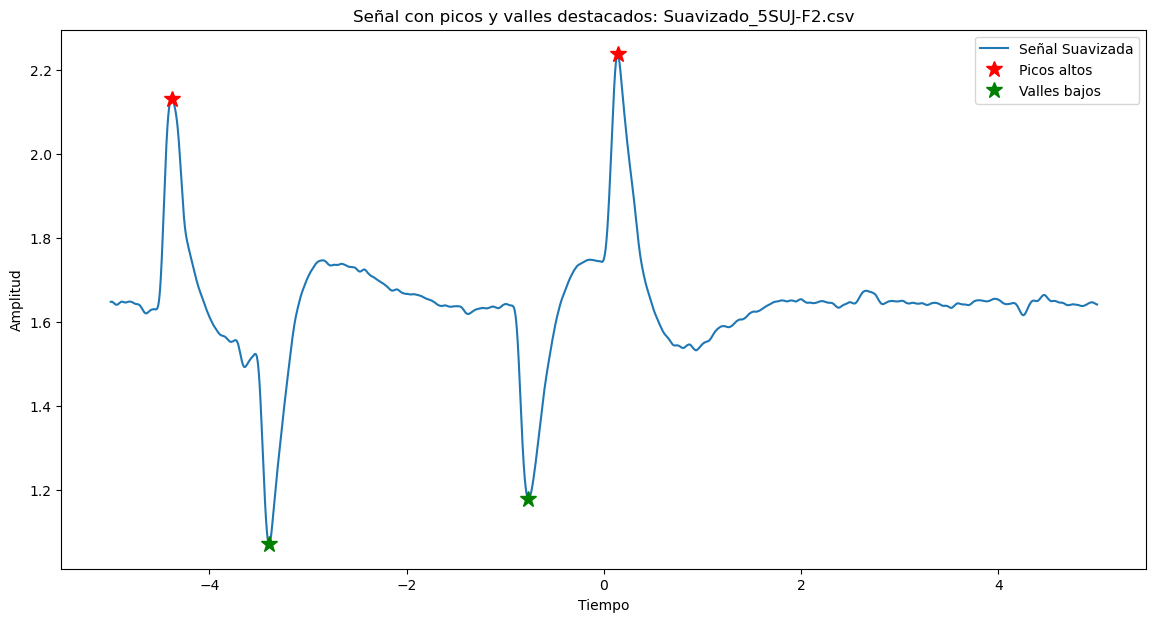

Codificación para el archivo Suavizado_5SUJ-F2.csv: U D D U


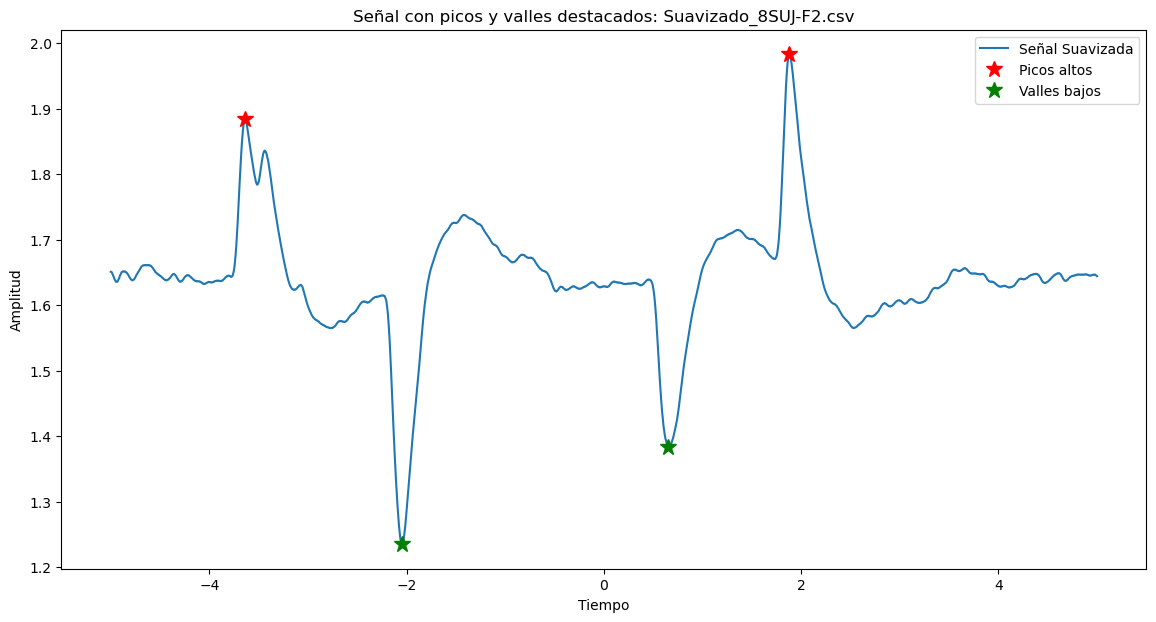

Codificación para el archivo Suavizado_8SUJ-F2.csv: U D D U


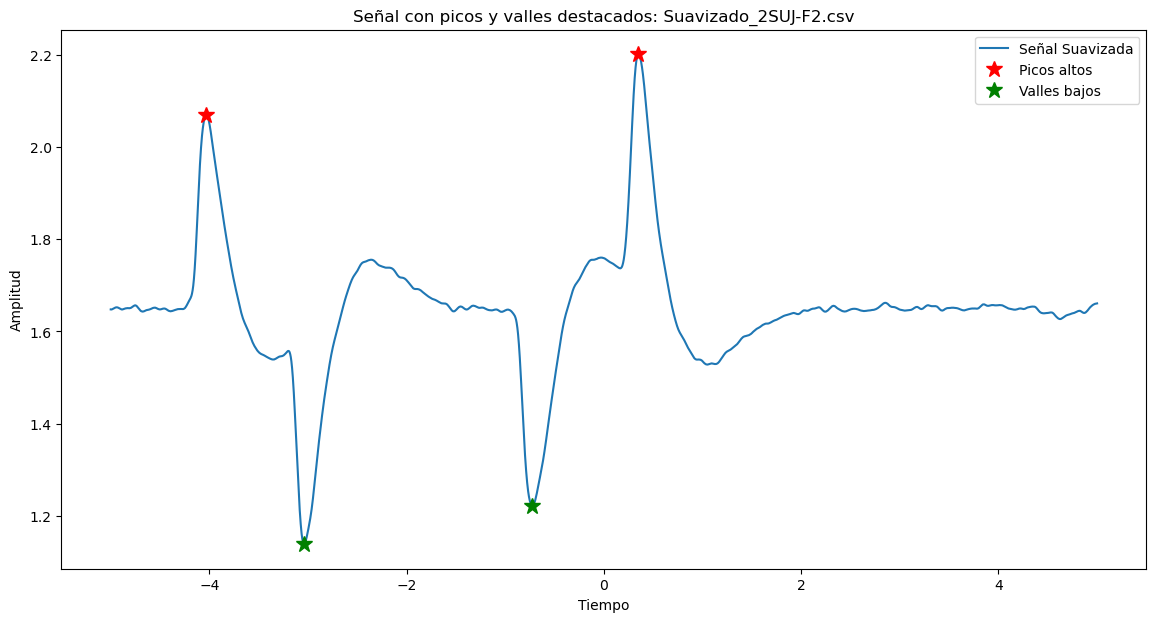

Codificación para el archivo Suavizado_2SUJ-F2.csv: U D D U


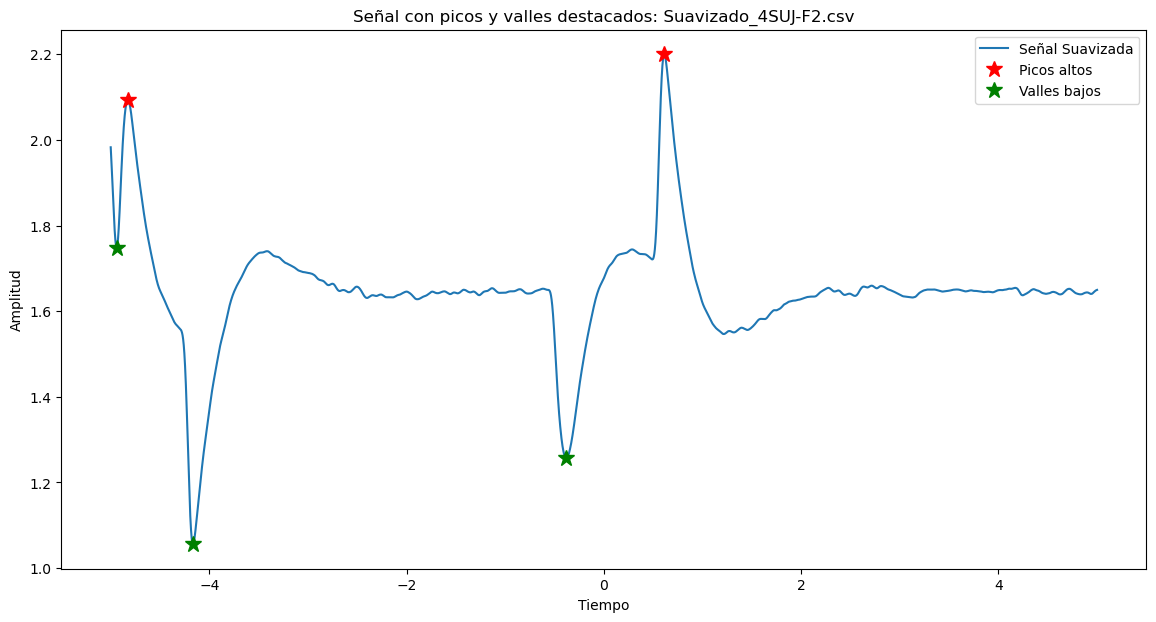

Codificación para el archivo Suavizado_4SUJ-F2.csv: D U D D U


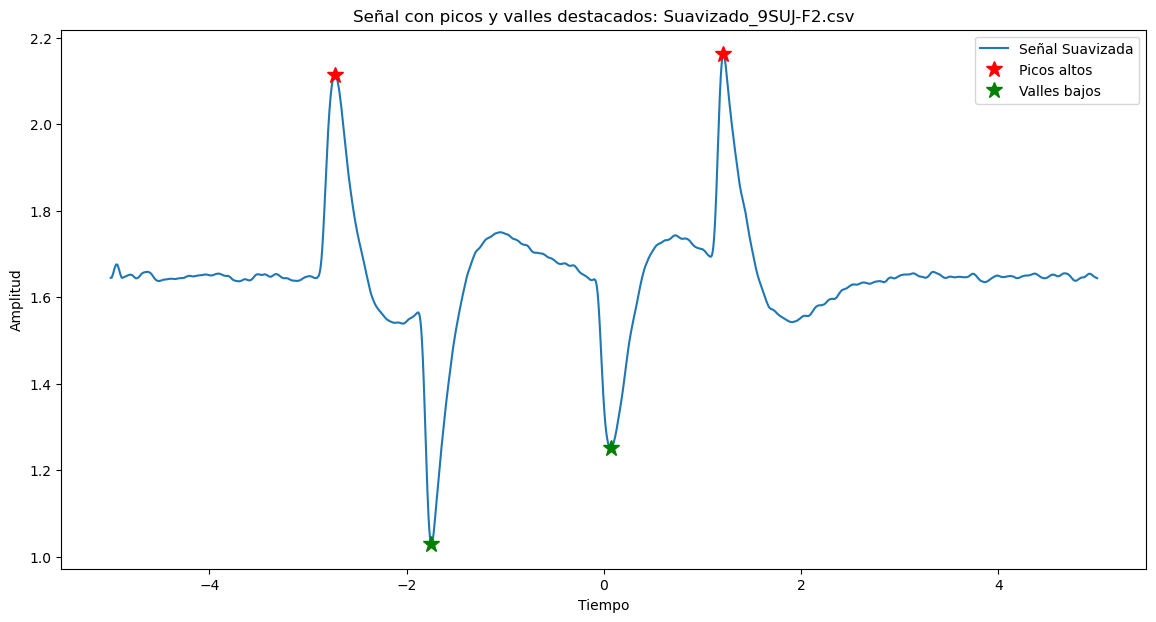

Codificación para el archivo Suavizado_9SUJ-F2.csv: U D D U


In [44]:
# Definición del directorio que contiene los archivos CSV
directorio_csv = 'CSV_SMOOTH_F2'
        
def codificar_movimiento_ocular(picos_indices, valles_indices):
    # Asumimos que los índices de picos y valles están ordenados
    movimientos = []
    indice_picos = 0
    indice_valles = 0

    # Mientras haya picos o valles para procesar
    while indice_picos < len(picos_indices) or indice_valles < len(valles_indices):
        # Si todavía hay picos y valles para procesar
        if indice_picos < len(picos_indices) and indice_valles < len(valles_indices):
            # Si el próximo pico viene antes que el próximo valle
            if picos_indices[indice_picos] < valles_indices[indice_valles]:
                movimientos.append('U')
                indice_picos += 1
            else:
                movimientos.append('D')
                indice_valles += 1
        # Si solo quedan picos para procesar
        elif indice_picos < len(picos_indices):
            movimientos.append('U')
            indice_picos += 1
        # Si solo quedan valles para procesar
        elif indice_valles < len(valles_indices):
            movimientos.append('D')
            indice_valles += 1
    
    # Convertir la lista de movimientos a una cadena
    return ' '.join(movimientos)

# Iterar sobre cada archivo CSV en el directorio especificado
for nombre_archivo in os.listdir(directorio_csv):
    if nombre_archivo.endswith('.csv'):
        ruta_completa = os.path.join(directorio_csv, nombre_archivo)
        df = pd.read_csv(ruta_completa)
        
        # Asegúrate de que la columna 'Señal Suavizada' existe en el DataFrame
        if 'Señal Suavizada' not in df.columns:
            print(f"El archivo {nombre_archivo} no contiene la columna 'Señal Suavizada'.")
            continue

    # Convertir la columna 'Señal Suavizada' a numérico y descartar NaNs
        df['Señal Suavizada'] = pd.to_numeric(df['Señal Suavizada'], errors='coerce')
        df.dropna(subset=['Señal Suavizada'], inplace=True)
        
    # Extraer la señal y el tiempo
        signal = df['Señal Suavizada'].values
        time = df['Tiempo'].values if 'Tiempo' in df.columns else np.arange(len(signal))

        # Configurar los parámetros para la detección de picos
        prominencia = np.max(signal) * 0.1
        # Establecer la altura mínima para los picos justo por encima de 1.8V
        altura_minima_picos = 1.85
        altura_minima_valles = 1.85
        altura_minima_valles = np.median(-signal) - np.std(-signal)
        distancia_minima = 100
        
        # Detectar picos y valles
        picos_indices, _ = find_peaks(signal, prominence=prominencia, height=altura_minima_picos, distance=distancia_minima)
        valles_indices, _ = find_peaks(-signal, prominence=prominencia, height=altura_minima_valles, distance=distancia_minima)

        # Visualización de la señal con picos y valles marcados
        plt.figure(figsize=(14, 7))
        plt.plot(time, signal, label='Señal Suavizada')
        plt.plot(time[picos_indices], signal[picos_indices], 'r*', markersize=12, label='Picos altos')
        plt.plot(time[valles_indices], signal[valles_indices], 'g*', markersize=12, label='Valles bajos')
        plt.legend()
        plt.title(f'Señal con picos y valles destacados: {nombre_archivo}')
        plt.xlabel('Tiempo')
        plt.ylabel('Amplitud')
        plt.show()
# Asegúrate de que picos_indices y valles_indices sean calculados aquí antes de llamar a la función codificar_movimiento_ocular
        codificacion = codificar_movimiento_ocular(picos_indices, valles_indices)
        print(f"Codificación para el archivo {nombre_archivo}: {codificacion}")


<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: lightsteelblue ;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 10px;
              color:snow;"> Codificación en puntos pares

</h2>
</div>

In [34]:
def interpretar_movimiento(P, V):
    # Asumimos que P y V son cadenas que pueden ser 'U' (UP) o 'D' (DOWN)
    
    # Si el pico es UP y el valle es DOWN, entonces es un movimiento a la derecha
    if P == 'U' and V == 'D':
        return "Derecha"
    
    # Si ambos pico y valle son DOWN, entonces es un movimiento hacia el centro
    if P == 'D' and V == 'D':
        return "Centro"
    
    # Si el pico es DOWN y el valle es UP, entonces es un movimiento a la izquierda
    if P == 'D' and V == 'U':
        return "Izquierda"
    
    return "Movimiento no reconocido"

<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: lightsteelblue ;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 10px;
              color:snow;"> Procesamiento, codificación y etiquetado de las señales

</h2>
</div>

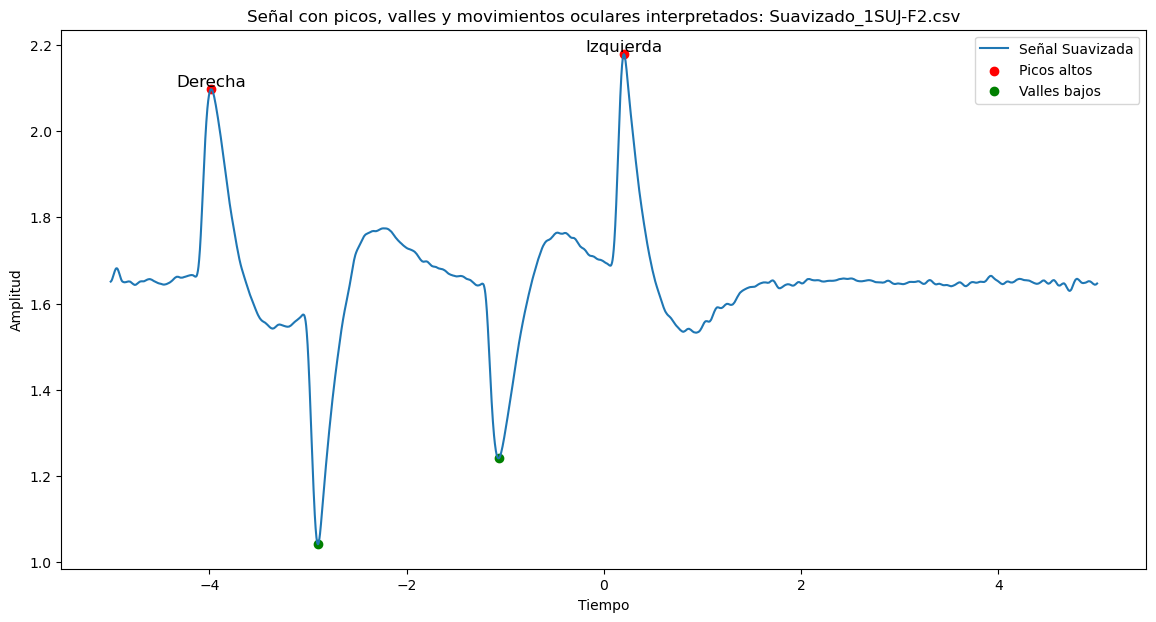

Codificación para el archivo Suavizado_1SUJ-F2.csv: U D D U
Interpretación para el archivo Suavizado_1SUJ-F2.csv: Derecha Izquierda


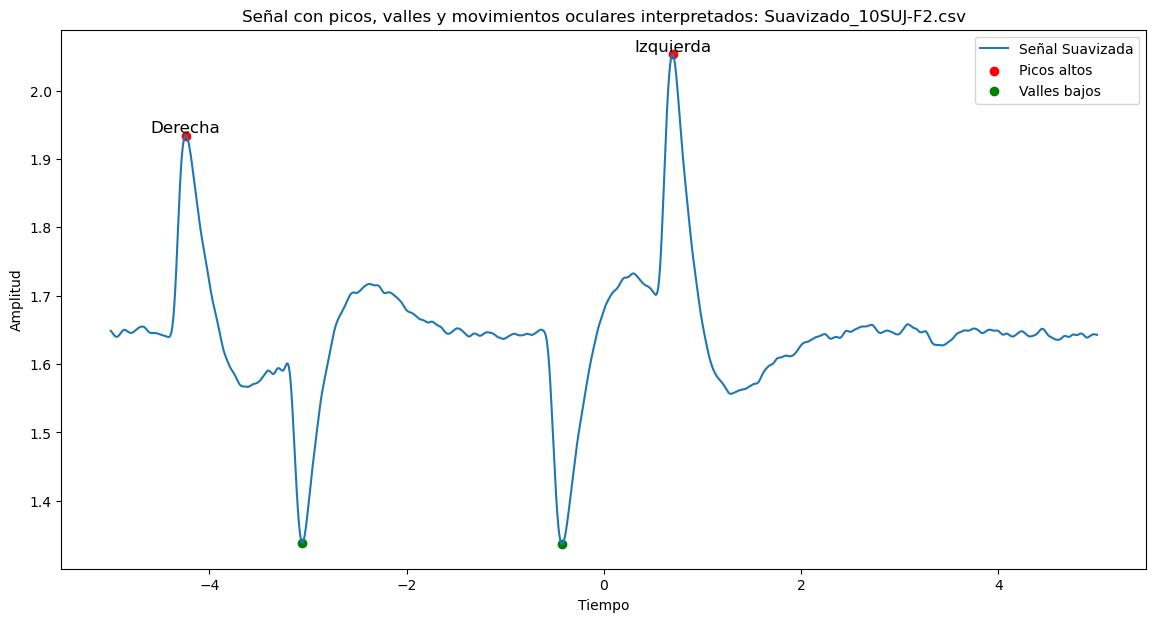

Codificación para el archivo Suavizado_10SUJ-F2.csv: U D D U
Interpretación para el archivo Suavizado_10SUJ-F2.csv: Derecha Izquierda


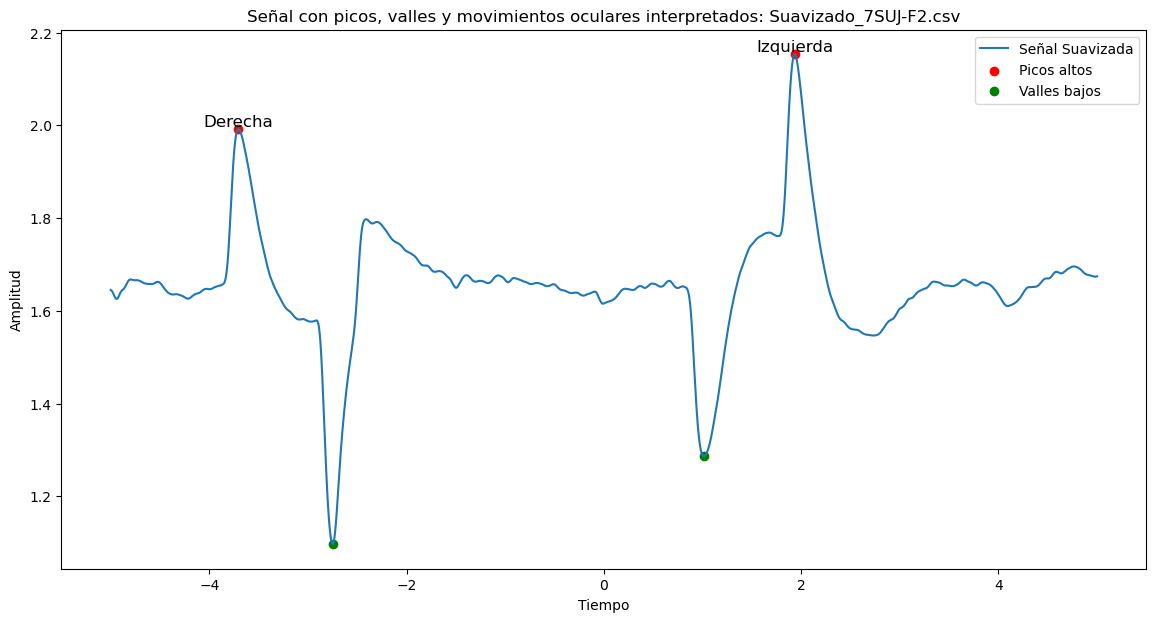

Codificación para el archivo Suavizado_7SUJ-F2.csv: U D D U
Interpretación para el archivo Suavizado_7SUJ-F2.csv: Derecha Izquierda


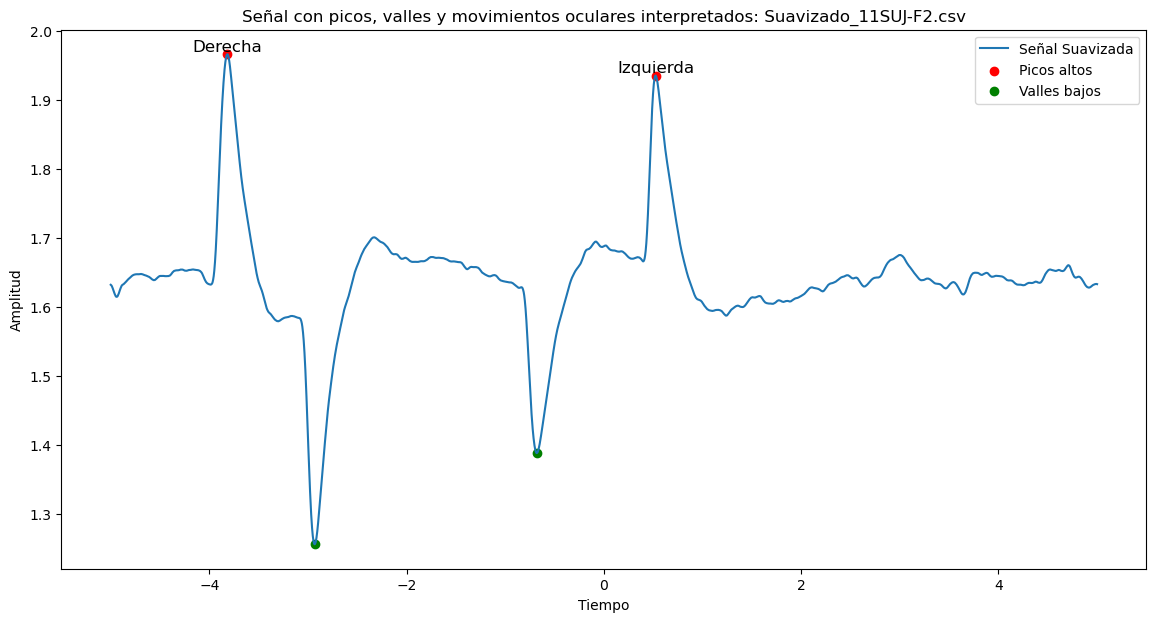

Codificación para el archivo Suavizado_11SUJ-F2.csv: U D D U
Interpretación para el archivo Suavizado_11SUJ-F2.csv: Derecha Izquierda


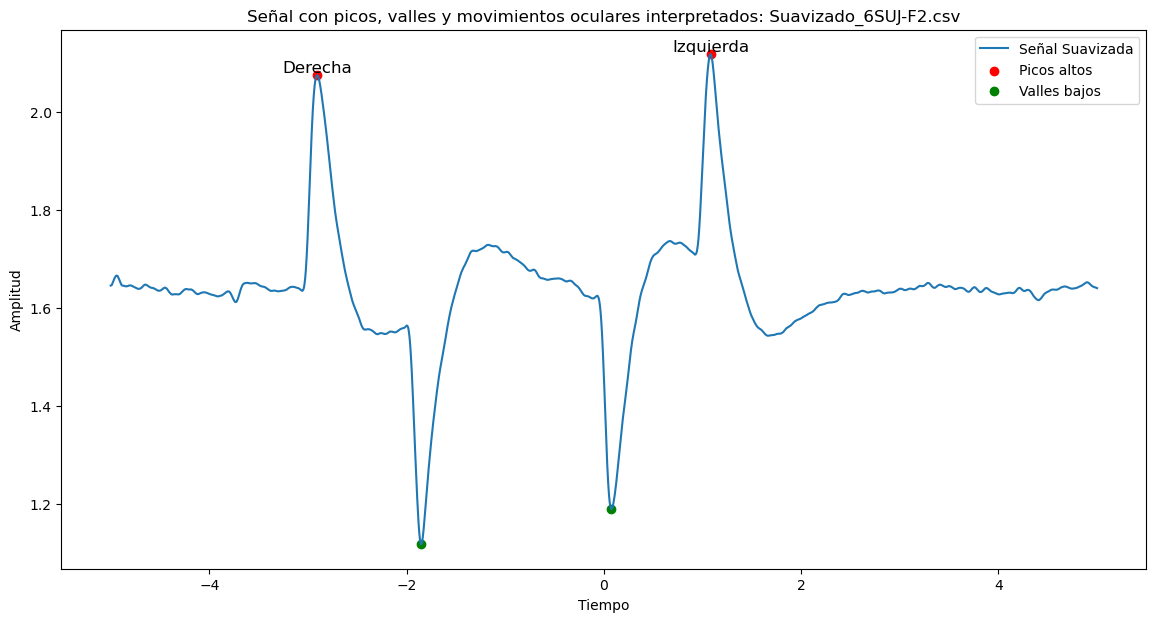

Codificación para el archivo Suavizado_6SUJ-F2.csv: U D D U
Interpretación para el archivo Suavizado_6SUJ-F2.csv: Derecha Izquierda


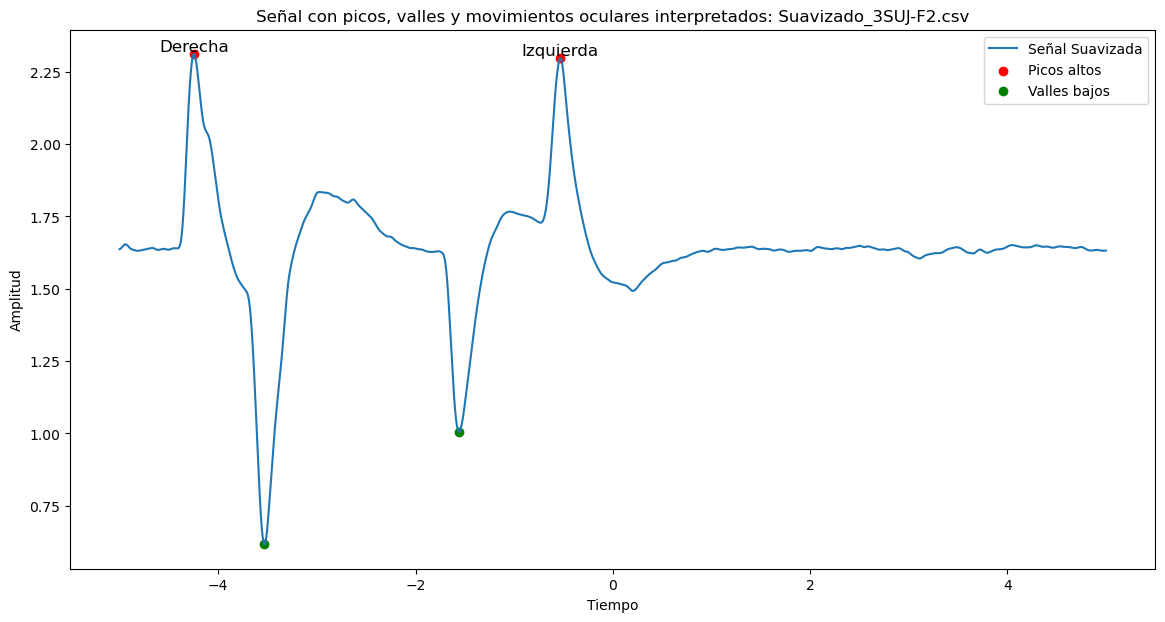

Codificación para el archivo Suavizado_3SUJ-F2.csv: U D D U
Interpretación para el archivo Suavizado_3SUJ-F2.csv: Derecha Izquierda


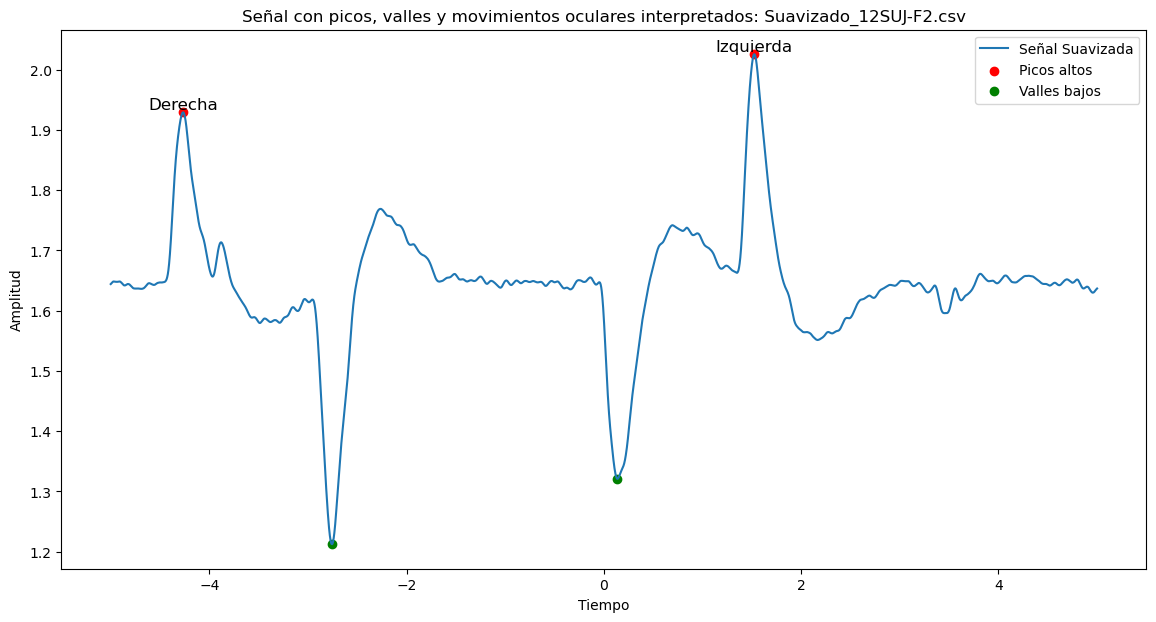

Codificación para el archivo Suavizado_12SUJ-F2.csv: U D D U
Interpretación para el archivo Suavizado_12SUJ-F2.csv: Derecha Izquierda


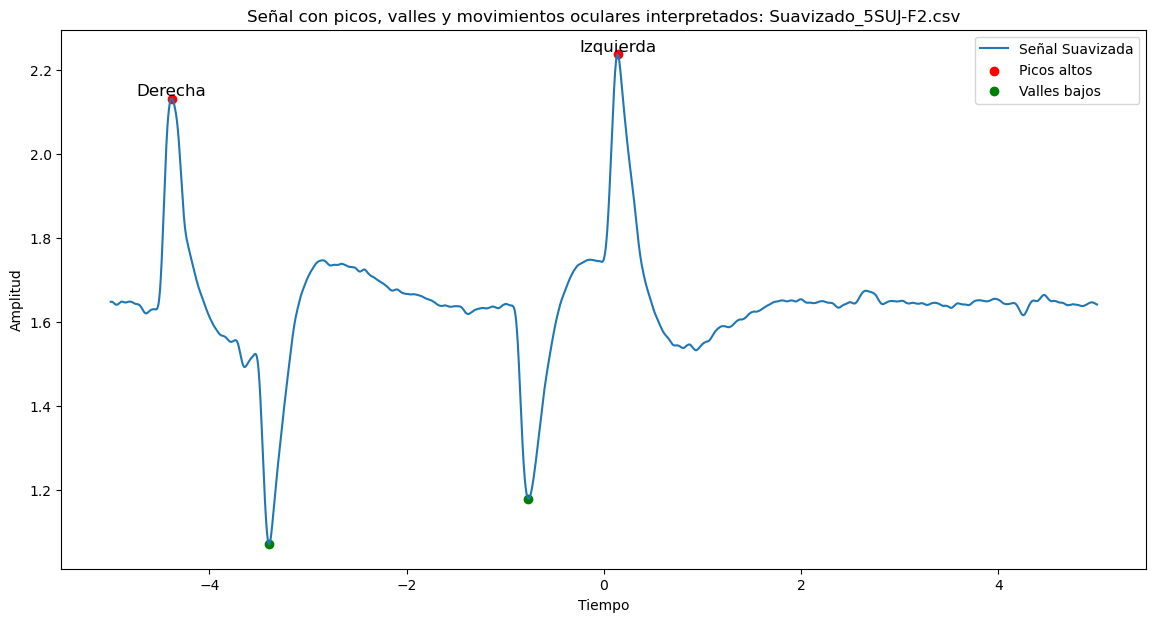

Codificación para el archivo Suavizado_5SUJ-F2.csv: U D D U
Interpretación para el archivo Suavizado_5SUJ-F2.csv: Derecha Izquierda


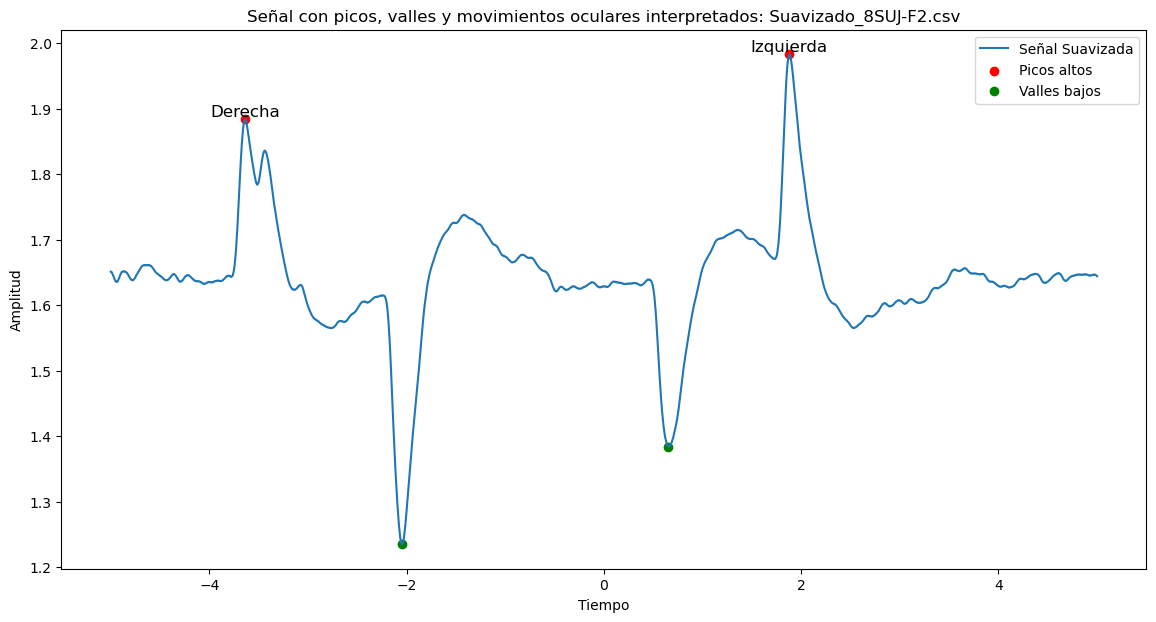

Codificación para el archivo Suavizado_8SUJ-F2.csv: U D D U
Interpretación para el archivo Suavizado_8SUJ-F2.csv: Derecha Izquierda


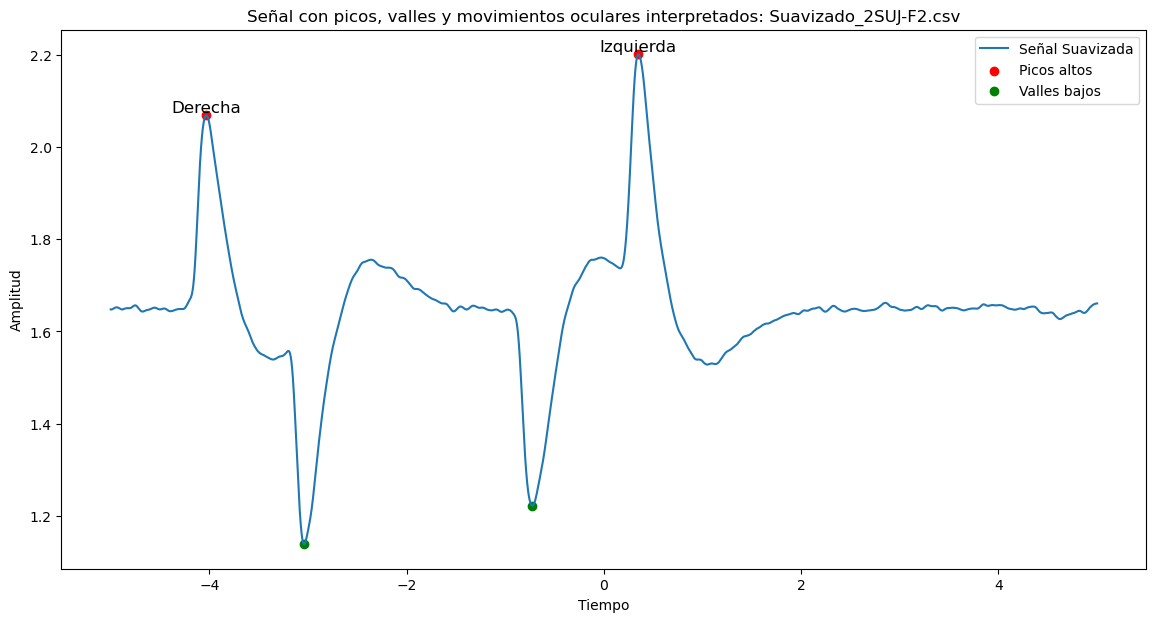

Codificación para el archivo Suavizado_2SUJ-F2.csv: U D D U
Interpretación para el archivo Suavizado_2SUJ-F2.csv: Derecha Izquierda


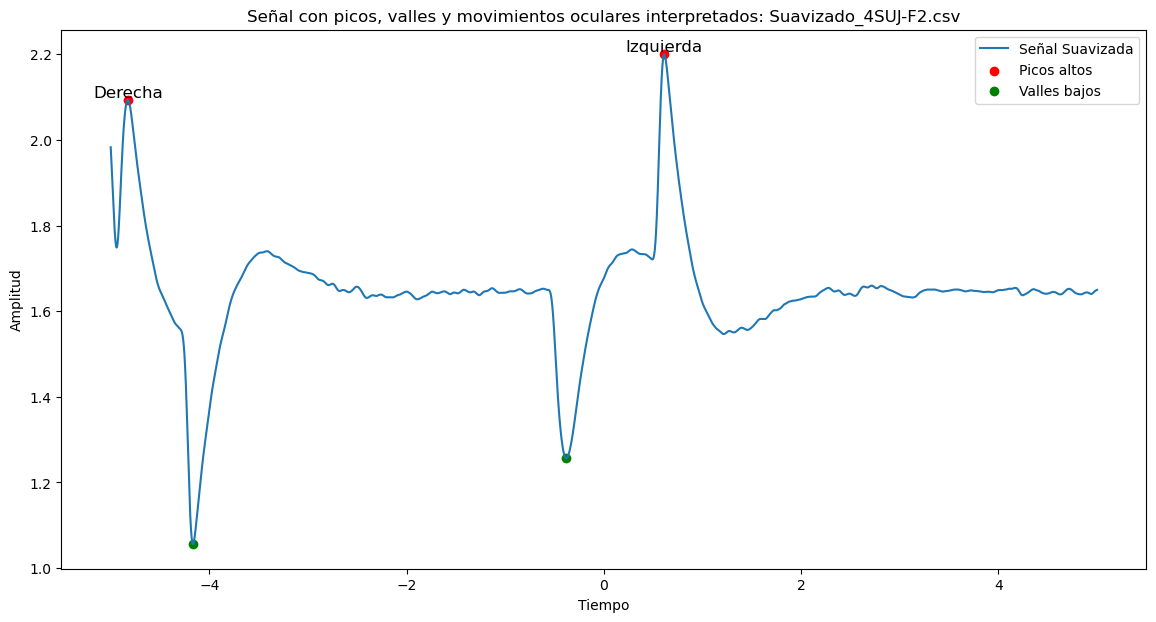

Codificación para el archivo Suavizado_4SUJ-F2.csv: U D D U
Interpretación para el archivo Suavizado_4SUJ-F2.csv: Derecha Izquierda


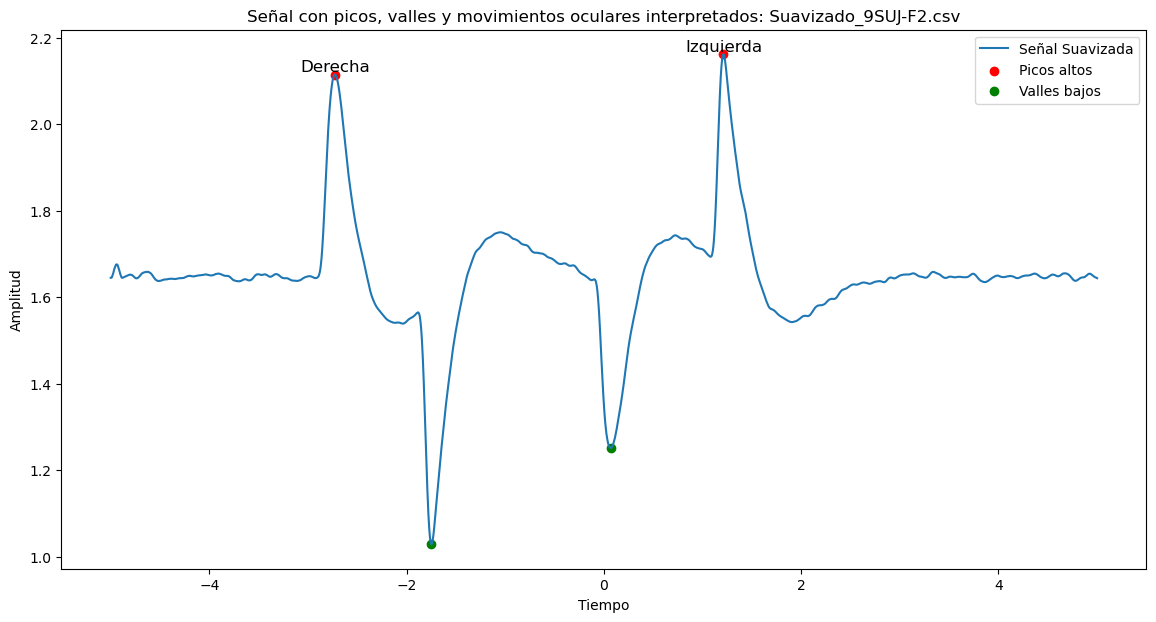

Codificación para el archivo Suavizado_9SUJ-F2.csv: U D D U
Interpretación para el archivo Suavizado_9SUJ-F2.csv: Derecha Izquierda


In [15]:
# Función para interpretar los movimientos de pico y valle
def interpretar_movimiento(P, V):
    if P == 'U' and V == 'D':
        return "Derecha"
    if P == 'D' and V == 'D':
        return "Centro"
    if P == 'D' and V == 'U':
        return "Izquierda"
    return "Movimiento no reconocido"

def codificar_movimiento_ocular(picos_indices, valles_indices):
    # Asumimos que los índices de picos y valles están ordenados
    movimientos = []
    indice_picos = 0
    indice_valles = 0

    # Mientras haya picos o valles para procesar
    while indice_picos < len(picos_indices) or indice_valles < len(valles_indices):
        # Si todavía hay picos y valles para procesar
        if indice_picos < len(picos_indices) and indice_valles < len(valles_indices):
            # Si el próximo pico viene antes que el próximo valle
            if picos_indices[indice_picos] < valles_indices[indice_valles]:
                movimientos.append('U')
                indice_picos += 1
            else:
                movimientos.append('D')
                indice_valles += 1
        # Si solo quedan picos para procesar
        elif indice_picos < len(picos_indices):
            movimientos.append('U')
            indice_picos += 1
        # Si solo quedan valles para procesar
        elif indice_valles < len(valles_indices):
            movimientos.append('D')
            indice_valles += 1
    
    # Convertir la lista de movimientos a una cadena
    return ' '.join(movimientos)



# Directorio con los archivos CSV
directorio_csv = 'CSV_SMOOTH_F2'

for nombre_archivo in os.listdir(directorio_csv):
    if nombre_archivo.endswith('.csv'):
        ruta_completa = os.path.join(directorio_csv, nombre_archivo)
        df = pd.read_csv(ruta_completa)
        
        # Verificar la existencia de la columna 'Señal Suavizada'
        if 'Señal Suavizada' not in df.columns:
            print(f"El archivo {nombre_archivo} no contiene la columna 'Señal Suavizada'.")
            continue

        df['Señal Suavizada'] = pd.to_numeric(df['Señal Suavizada'], errors='coerce')
        df.dropna(subset=['Señal Suavizada'], inplace=True)
        
        signal = df['Señal Suavizada'].values
        time = df['Tiempo'].values if 'Tiempo' in df.columns else np.arange(len(signal))

        # Ajustes para la detección de picos y valles
        prominencia = np.max(signal) * 0.12
        altura_minima_picos = 1.85
        altura_minima_valles = np.median(-signal) - np.std(-signal)
        distancia_minima = 100
        
        picos_indices, _ = find_peaks(signal, prominence=prominencia, height=altura_minima_picos, distance=distancia_minima)
        valles_indices, _ = find_peaks(-signal, prominence=prominencia, height=altura_minima_valles, distance=distancia_minima)
        
        # Asegúrate de reiniciar la lista de interpretaciones para cada archivo
        interpretaciones = []

        codificacion = codificar_movimiento_ocular(picos_indices, valles_indices)
        codigos = codificacion.split()
        
        # Asegúrate de tener un número par de elementos para interpretar en pares P-V
        if len(codigos) % 2 != 0:
            codigos.append('')  # Agrega un elemento vacío si es impar

        for i in range(0, len(codigos), 2):
            P = codigos[i]
            V = codigos[i + 1]
            interpretaciones.append(interpretar_movimiento(P, V))

        
        directorio_graficas = 'F2SEN_COD_FINAL_ELECT'
        os.makedirs(directorio_graficas, exist_ok=True)
            
        # Visualización de la señal con picos y valles marcados y etiquetados
        plt.figure(figsize=(14, 7))
        plt.plot(time, signal, label='Señal Suavizada')
        plt.scatter(time[picos_indices], signal[picos_indices], color='red', label='Picos altos')
        plt.scatter(time[valles_indices], signal[valles_indices], color='green', label='Valles bajos')
        
        for i, interpretacion in enumerate(interpretaciones):
            if i < len(picos_indices):
                etiqueta = f"{interpretacion}\n{time[picos_indices][i]}s, {signal[picos_indices][i]}V"
                plt.text(time[picos_indices][i], signal[picos_indices][i], interpretacion, fontsize=12, ha='center', va='bottom')

        plt.legend()
        plt.title(f'Señal con picos, valles y movimientos oculares interpretados: {nombre_archivo}')
        plt.xlabel('Tiempo')
        plt.ylabel('Amplitud')
        
        nombre_grafica = os.path.join(directorio_graficas, f"{nombre_archivo.split('.')[0]}.png")
        plt.savefig(nombre_grafica)
        plt.show()

        
        print(f"Codificación para el archivo {nombre_archivo}: {codificacion}")
        print(f"Interpretación para el archivo {nombre_archivo}: {' '.join(interpretaciones)}")
        
